# Caso práctico Fintech 2022 - Data Science - Regresión

## Dataset: 🚓 Coches 🚔

### Información del dataset

El dataset recoge la siguiente información de 205 coches:

* **Car_ID**: id para identificar unívocamente cada coche.
* **CarName**: Nombre del coche en cuestión.
* **fueltype**: tipo de gasolina que usa el coche.
* **doornumber**: número de puertas que tiene el coche.
* **carbody**: estilo de la carrocería del coche.
* **enginelocation**: localización del motor en el coche.
* **wheelbase**: distancia entre el centro de las ruedas delanteras y traseras.
* **carlength**: longitud del coche.
* **carwidth**: ancho del coche.
* **carheight**: altura del coche.
* **curbweight**: peso del coche.
* **cylindernumber**: numero de cilindros del motor del coche.
* **enginesize**: tamaño del motor.
* **horsepower**: caballos de potencia del coche.
* **peak rpm**: revoluciones por minuto máximas.
* **citympg**: puntuación de consumo de gasolina en ciudad.
* **highwaympg**: puntuación de consumo de gasolina en carretera.


El contenido de este notebook está basado en [este](https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe) ejemplo disponible en Kaggle.


### Objetivo de la práctica

Esta práctica tiene como objetivo hacer uso de métodos de regresión para predecir el valor de ciertas variables continuas del coche a partir de otras dadas.

### Analizando el dataset

Instalamos librerías adicionales necesarias para la práctica.

In [1]:
!pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Empezamos cargando el dataset en formato .csv en la memoria del sistema

In [2]:
#Importamos la librería/s para hacer uso de su código y funciones
from IPython.display import Image
from IPython.core.display import HTML 
import pandas as pd

cars_data = pd.read_csv('/content/CarData.csv')
cars_data

car_ID                   CarName fueltype doornumber      carbody  \
0         1        alfa-romero giulia      gas        two  convertible   
1         2       alfa-romero stelvio      gas        two  convertible   
2         3  alfa-romero Quadrifoglio      gas        two    hatchback   
3         4               audi 100 ls      gas       four        sedan   
4         5                audi 100ls      gas       four        sedan   
..      ...                       ...      ...        ...          ...   
200     201           volvo 145e (sw)      gas       four        sedan   
201     202               volvo 144ea      gas       four        sedan   
202     203               volvo 244dl      gas       four        sedan   
203     204                 volvo 246   diesel       four        sedan   
204     205               volvo 264gl      gas       four        sedan   

    enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0            front       88.6      168.8      64.1       48.8        2548   
1            front       88.6      168.8      64.1       48.8        2548   
2            front       94.5      171.2      65.5       52.4        2823   
3            front       99.8      176.6      66.2       54.3        2337   
4            front       99.4      176.6      66.4       54.3        2824   
..             ...        ...        ...       ...        ...         ...   
200          front      109.1      188.8      68.9       55.5        2952   
201          front      109.1      188.8      68.8       55.5        3049   
202          front      109.1      188.8      68.9       55.5        3012   
203          front      109.1      188.8      68.9       55.5        3217   
204          front      109.1      188.8      68.9       55.5        3062   

    cylindernumber  enginesize  horsepower  peakrpm  citympg  highwaympg  \
0             four         130         111     5000       21          27   
1             four         130         111     5000       21          27   
2              six         152         154     5000       19          26   
3             four         109         102     5500       24          30   
4             five         136         115     5500       18          22   
..             ...         ...         ...      ...      ...         ...   
200           four         141         114     5400       23          28   
201           four         141         160     5300       19          25   
202            six         173         134     5500       18          23   
203            six         145         106     4800       26          27   
204           four         141         114     5400       19          25   

       price  
0    13495.0  
1    16500.0  
2    16500.0  
3    13950.0  
4    17450.0  
..       ...  
200  16845.0  
201  19045.0  
202  21485.0  
203  22470.0  
204  22625.0  

[205 rows x 18 columns]

#### Visualización y limpiando las variables discretas y  categóricas

* Podemos extraer la marca del coche a partir de su nombre (la primera palabra)

* Pasamos de la representación textual de los números a su representación numércia de las siguientes variables:
  * "doornumber"
  * "cylindernumber"

In [3]:
from word2number import w2n
# Podemos intentar extraer la marca del coche a partir del nombre del mismo
cars_data['brand'] = cars_data['CarName'].map(lambda name: name.split(' ')[0])

# Las variables doornumber y cylindernumber pueden ser transformadas por su representación numércia
cars_data['doornumber'] = cars_data['doornumber'].map(lambda numb_dors: w2n.word_to_num(numb_dors))
cars_data['cylindernumber'] = cars_data['cylindernumber'].map(lambda numb_dors: w2n.word_to_num(numb_dors))

cars_data

car_ID                   CarName fueltype  doornumber      carbody  \
0         1        alfa-romero giulia      gas           2  convertible   
1         2       alfa-romero stelvio      gas           2  convertible   
2         3  alfa-romero Quadrifoglio      gas           2    hatchback   
3         4               audi 100 ls      gas           4        sedan   
4         5                audi 100ls      gas           4        sedan   
..      ...                       ...      ...         ...          ...   
200     201           volvo 145e (sw)      gas           4        sedan   
201     202               volvo 144ea      gas           4        sedan   
202     203               volvo 244dl      gas           4        sedan   
203     204                 volvo 246   diesel           4        sedan   
204     205               volvo 264gl      gas           4        sedan   

    enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0            front       88.6      168.8      64.1       48.8        2548   
1            front       88.6      168.8      64.1       48.8        2548   
2            front       94.5      171.2      65.5       52.4        2823   
3            front       99.8      176.6      66.2       54.3        2337   
4            front       99.4      176.6      66.4       54.3        2824   
..             ...        ...        ...       ...        ...         ...   
200          front      109.1      188.8      68.9       55.5        2952   
201          front      109.1      188.8      68.8       55.5        3049   
202          front      109.1      188.8      68.9       55.5        3012   
203          front      109.1      188.8      68.9       55.5        3217   
204          front      109.1      188.8      68.9       55.5        3062   

     cylindernumber  enginesize  horsepower  peakrpm  citympg  highwaympg  \
0                 4         130         111     5000       21          27   
1                 4         130         111     5000       21          27   
2                 6         152         154     5000       19          26   
3                 4         109         102     5500       24          30   
4                 5         136         115     5500       18          22   
..              ...         ...         ...      ...      ...         ...   
200               4         141         114     5400       23          28   
201               4         141         160     5300       19          25   
202               6         173         134     5500       18          23   
203               6         145         106     4800       26          27   
204               4         141         114     5400       19          25   

       price        brand  
0    13495.0  alfa-romero  
1    16500.0  alfa-romero  
2    16500.0  alfa-romero  
3    13950.0         audi  
4    17450.0         audi  
..       ...          ...  
200  16845.0        volvo  
201  19045.0        volvo  
202  21485.0        volvo  
203  22470.0        volvo  
204  22625.0        volvo  

[205 rows x 19 columns]

Observamos la distribución de las variables creadas para visualizar algún error en los datos rápidamente.

In [4]:
cars_data.describe()

car_ID  doornumber   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    3.121951   98.756585  174.049268   65.907805   53.724878   
std     59.322565    0.994966    6.021776   12.337289    2.145204    2.443522   
min      1.000000    2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    2.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    4.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    4.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    4.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  cylindernumber  enginesize  horsepower      peakrpm  \
count   205.000000      205.000000  205.000000  205.000000   205.000000   
mean   2555.565854        4.380488  126.907317  104.117073  5125.121951   
std     520.680204        1.080854   41.642693   39.544167   476.985643   
min    1488.000000        2.000000   61.000000   48.000000  4150.000000   
25%    2145.000000        4.000000   97.000000   70.000000  4800.000000   
50%    2414.000000        4.000000  120.000000   95.000000  5200.000000   
75%    2935.000000        4.000000  141.000000  116.000000  5500.000000   
max    4066.000000       12.000000  326.000000  288.000000  6600.000000   

          citympg  highwaympg         price  
count  205.000000  205.000000    205.000000  
mean    25.219512   30.751220  13276.710571  
std      6.542142    6.886443   7988.852332  
min     13.000000   16.000000   5118.000000  
25%     19.000000   25.000000   7788.000000  
50%     24.000000   30.000000  10295.000000  
75%     30.000000   34.000000  16503.000000  
max     49.000000   54.000000  45400.000000

In [5]:
# Función para realizar las principales visualizaciones para las variables CONTINUAS (columns)
# Seleccionadas del dataset (df) seleccionado
def plot_cont_vars_plots(df, columns, base_fig_height = 10):
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns

  numb_cols = 3
  numb_rows = len(columns)
  
  print('Using plot grid of [{0}] rows and [{1}] cols'.format(numb_rows, numb_cols))
  
  fig, axs = plt.subplots(nrows = numb_rows, ncols = numb_cols)
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)
  
  counter = 0
  for column, ax in zip(columns, axs):
    sns.histplot(df[column], ax=ax[0], kde= True, color = sns.color_palette()[counter])
    sns.violinplot(x=df[column], ax=ax[1], color = sns.color_palette()[counter])
    sns.boxplot(x=df[column], color = sns.color_palette()[counter], ax=ax[2], width=0.3)
    counter +=1
  #return fig

# Función para realizar las principales visualizaciones para las variables DISCRETAS (columns)
# Seleccionadas del dataset (df) seleccionado
def plot_discret_vars_plots(df, columns, base_fig_height = 10):
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns

  numb_cols = 2
  numb_rows = len(columns)
  
  print('Using plot grid of [{0}] rows and [{1}] cols'.format(numb_rows, numb_cols))
  
  fig, axs = plt.subplots(nrows = numb_rows, ncols = numb_cols)
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)
  
  counter = 0
  for column, ax in zip(columns, axs):
    sns.countplot(data = df, x = column, ax=ax[0], color = sns.color_palette()[counter])
    df.groupby(column).size().plot(kind='pie', ax=ax[1], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
    counter +=1
  #return fig

Visualizamos la distribución de las variables discretas y categóricas.

Using plot grid of [6] rows and [2] cols


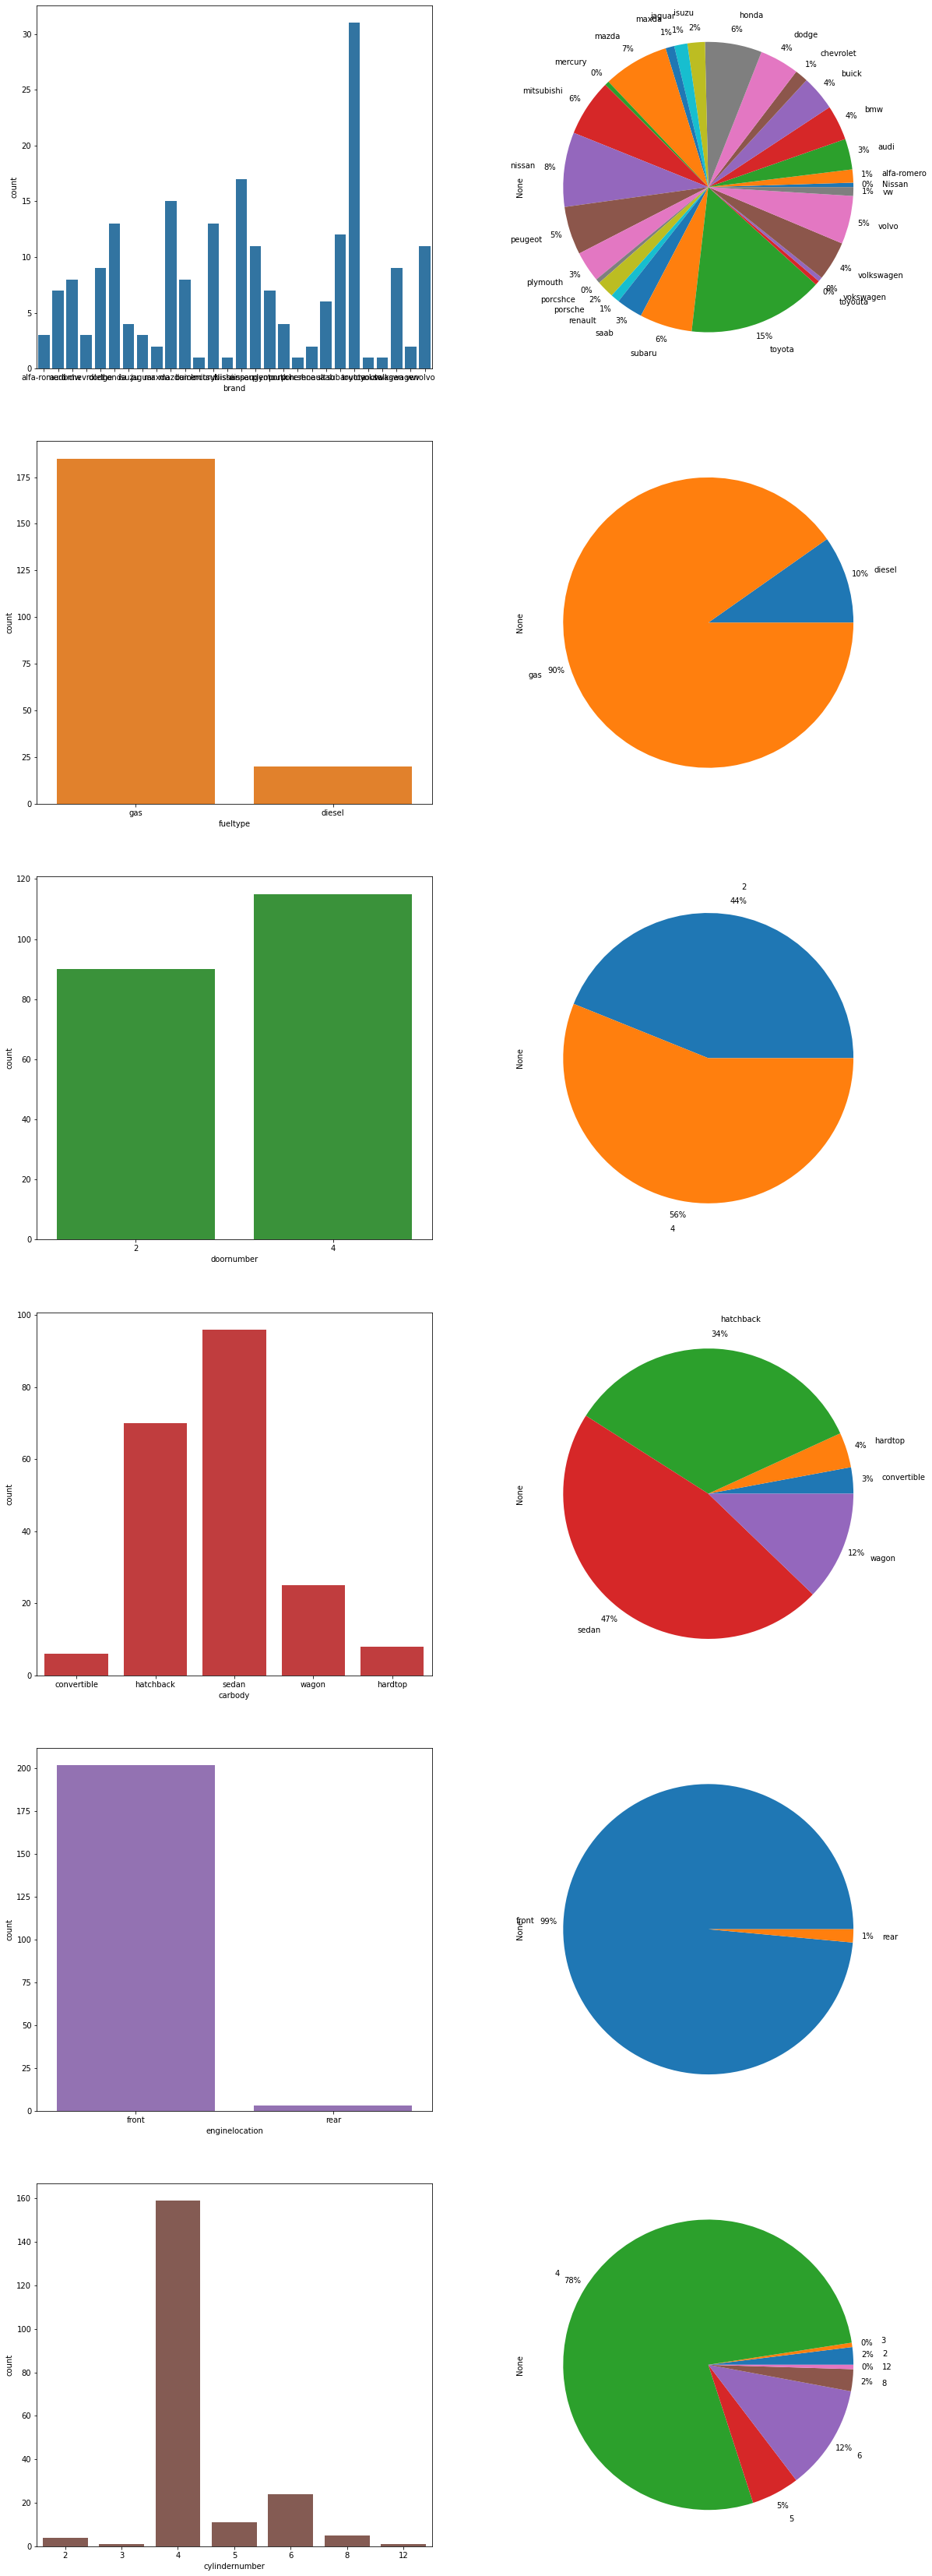

In [6]:
plot_discret_vars_plots(cars_data, ['brand', 'fueltype', 'doornumber', 'carbody', 'enginelocation', 'cylindernumber'])

Observamos que la variable "brand" (marca) de algunos coches contiene alguna que otra errata en algunos de sus casos. Vamos a corregir estas erratas una a una.

In [7]:
#Ponemos todas las marcas con minúscula
cars_data['brand'] = cars_data['brand'].str.lower()

cars_data['brand'] = cars_data['brand'].replace('maxda', 'mazda')
cars_data['brand'] = cars_data['brand'].replace('porcshce', 'porsche')
cars_data['brand'] = cars_data['brand'].replace('toyouta', 'toyota')
cars_data['brand'] = cars_data['brand'].replace('vokswagen', 'volkswagen')
cars_data['brand'] = cars_data['brand'].replace('vw', 'volkswagen')

Miramos la distribución de las marcas una vez solucionadas las erratas.

Using plot grid of [1] rows and [2] cols


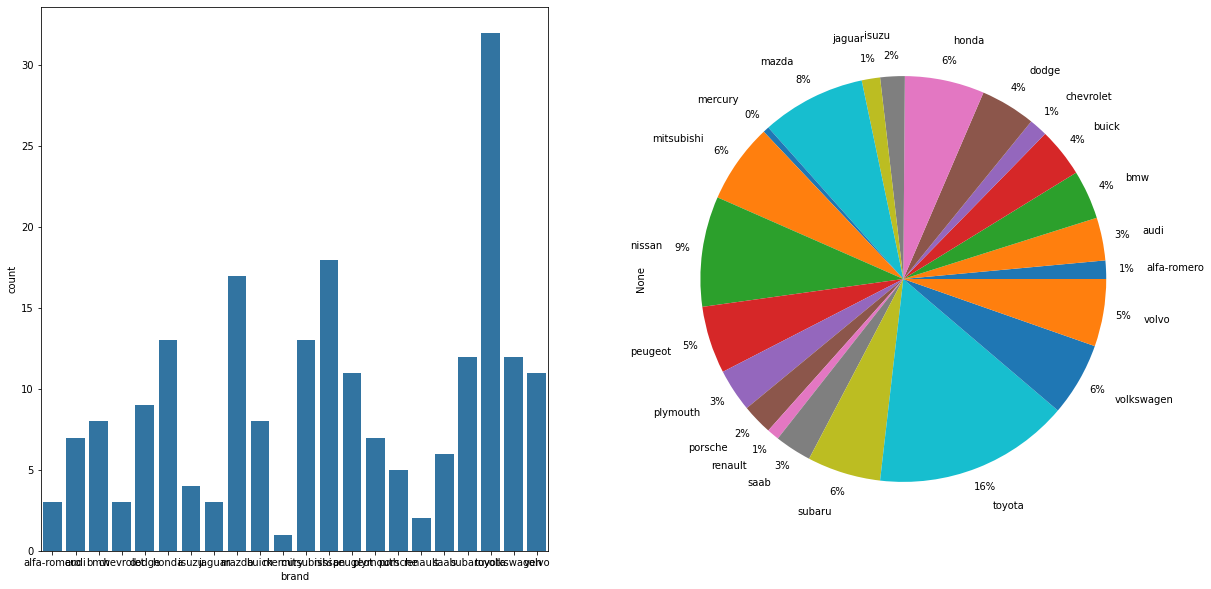

In [8]:
plot_discret_vars_plots(cars_data, ['brand'])

Dado que existe una gran cantidad de marcas, vamos a intentar transformar las minoritarias a la marca "other" ("otros").

In [9]:
# Transformamos las clases minoritarias (por debajo del porcentaje) a la clase "other"
def categ_transf_to_other(df, column, perc_thresh = 5):
  agg_data = df.groupby(column).size().to_frame().rename(columns={0 : 'numb_rows'}).reset_index()
  agg_data['perc'] = agg_data['numb_rows'].map(lambda x: x/len(df) * 100)
  values_to_transform_to_others = agg_data[agg_data['perc'] < perc_thresh][column].values

  print("Turning the following categorical values to 'other' {0}".format(values_to_transform_to_others))

  df.loc[df[column].isin(values_to_transform_to_others), column] = 'other'

  return df

cars_cleaned_data = categ_transf_to_other(cars_data, 'brand')

Turning the following categorical values to 'other' ['alfa-romero' 'audi' 'bmw' 'buick' 'chevrolet' 'dodge' 'isuzu' 'jaguar'
 'mercury' 'plymouth' 'porsche' 'renault' 'saab']


Observamos la distribución resultante después de esta transformación.

Using plot grid of [1] rows and [2] cols


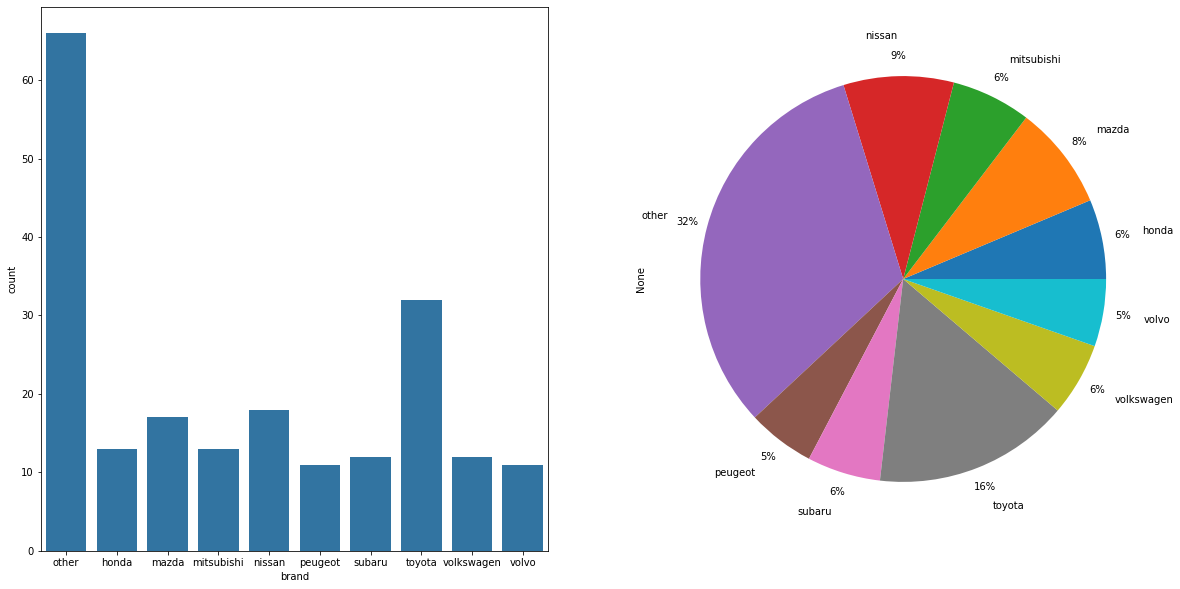

In [10]:
plot_discret_vars_plots(cars_data, ['brand'])

#### Visualización y limpiando las variables continuas

Volvemos a visualizar el dataset para revisar las variables continuas presentes en el mismo.

In [11]:
cars_data

car_ID                   CarName fueltype  doornumber      carbody  \
0         1        alfa-romero giulia      gas           2  convertible   
1         2       alfa-romero stelvio      gas           2  convertible   
2         3  alfa-romero Quadrifoglio      gas           2    hatchback   
3         4               audi 100 ls      gas           4        sedan   
4         5                audi 100ls      gas           4        sedan   
..      ...                       ...      ...         ...          ...   
200     201           volvo 145e (sw)      gas           4        sedan   
201     202               volvo 144ea      gas           4        sedan   
202     203               volvo 244dl      gas           4        sedan   
203     204                 volvo 246   diesel           4        sedan   
204     205               volvo 264gl      gas           4        sedan   

    enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0            front       88.6      168.8      64.1       48.8        2548   
1            front       88.6      168.8      64.1       48.8        2548   
2            front       94.5      171.2      65.5       52.4        2823   
3            front       99.8      176.6      66.2       54.3        2337   
4            front       99.4      176.6      66.4       54.3        2824   
..             ...        ...        ...       ...        ...         ...   
200          front      109.1      188.8      68.9       55.5        2952   
201          front      109.1      188.8      68.8       55.5        3049   
202          front      109.1      188.8      68.9       55.5        3012   
203          front      109.1      188.8      68.9       55.5        3217   
204          front      109.1      188.8      68.9       55.5        3062   

     cylindernumber  enginesize  horsepower  peakrpm  citympg  highwaympg  \
0                 4         130         111     5000       21          27   
1                 4         130         111     5000       21          27   
2                 6         152         154     5000       19          26   
3                 4         109         102     5500       24          30   
4                 5         136         115     5500       18          22   
..              ...         ...         ...      ...      ...         ...   
200               4         141         114     5400       23          28   
201               4         141         160     5300       19          25   
202               6         173         134     5500       18          23   
203               6         145         106     4800       26          27   
204               4         141         114     5400       19          25   

       price  brand  
0    13495.0  other  
1    16500.0  other  
2    16500.0  other  
3    13950.0  other  
4    17450.0  other  
..       ...    ...  
200  16845.0  volvo  
201  19045.0  volvo  
202  21485.0  volvo  
203  22470.0  volvo  
204  22625.0  volvo  

[205 rows x 19 columns]

Visualizamos la distribución de estas variables continuas.

Using plot grid of [10] rows and [3] cols


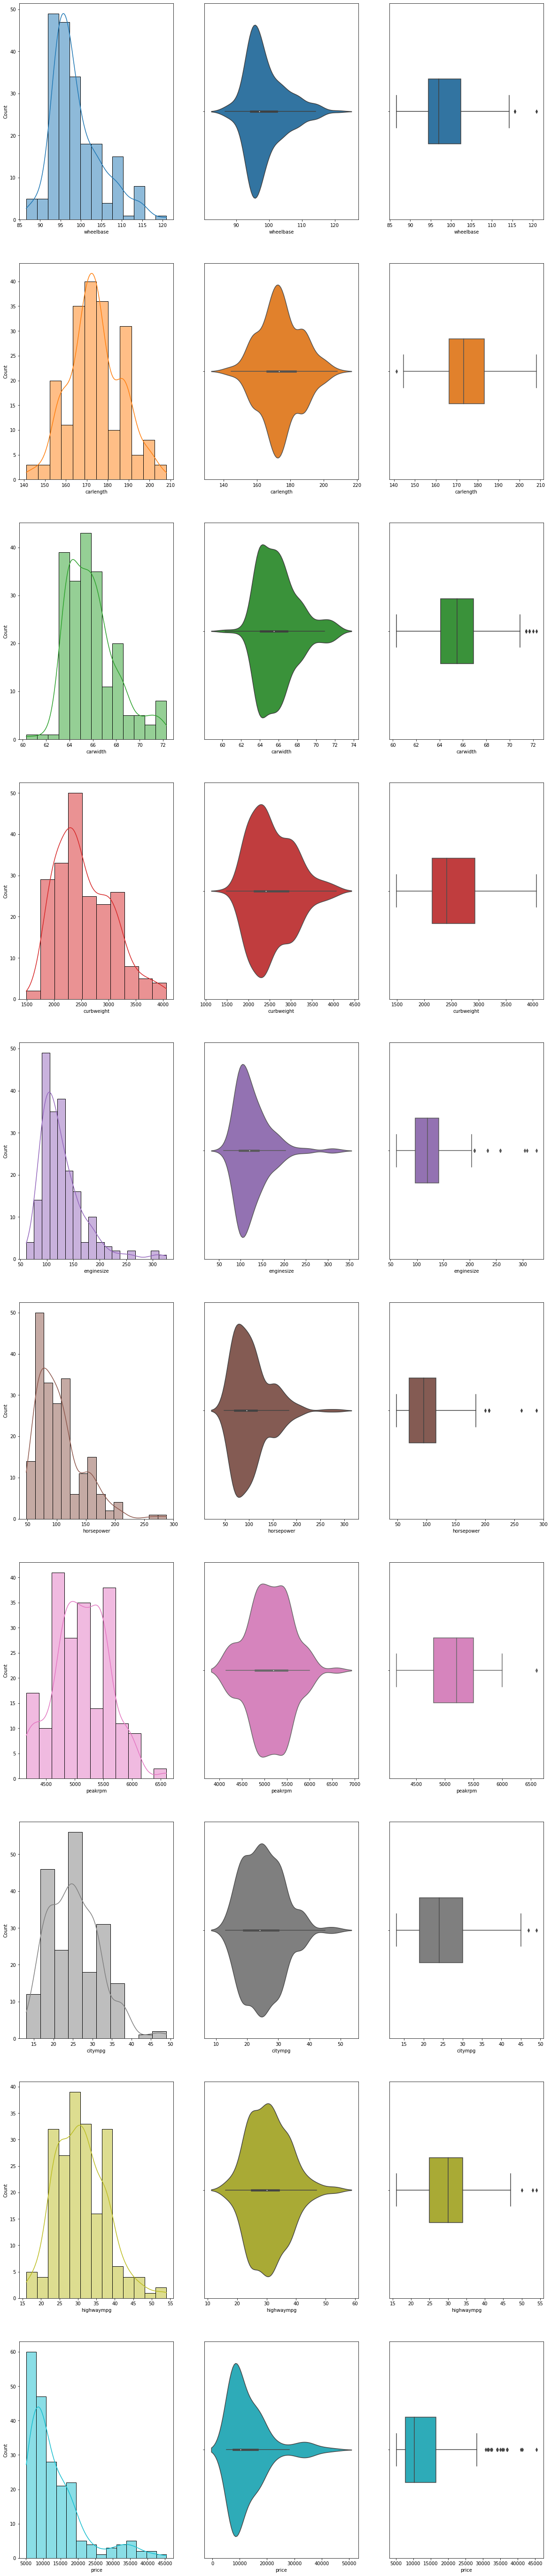

In [12]:
plot_cont_vars_plots(cars_data, ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'])

#### Buscando duplicados y valores faltantes

Nos deshacemos de la variable "car_ID" ya que no nos aporta ninguna información relevante acerca del coche que se pueda usar en los ejercicios de regresión posteriores.

Buscamos si encontramos algún coche que esté duplicado dentro del dataset.

In [13]:
cars_data = cars_data.drop(columns=['car_ID'])

cars_data[cars_data.duplicated()]

Empty DataFrame
Columns: [CarName, fueltype, doornumber, carbody, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, cylindernumber, enginesize, horsepower, peakrpm, citympg, highwaympg, price, brand]
Index: []

No hemos encontrado ningún duplicado total dentro del dataset.

Buscamos la presencia de datos faltantes dentro del dataset.

In [14]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {} - in percentage {}%'.format(col, df[col].isnull().sum(), df[col].isnull().sum()/len(df) * 100))
    print('\n')
    
display_missing(cars_data)

CarName column missing values: 0 - in percentage 0.0%
fueltype column missing values: 0 - in percentage 0.0%
doornumber column missing values: 0 - in percentage 0.0%
carbody column missing values: 0 - in percentage 0.0%
enginelocation column missing values: 0 - in percentage 0.0%
wheelbase column missing values: 0 - in percentage 0.0%
carlength column missing values: 0 - in percentage 0.0%
carwidth column missing values: 0 - in percentage 0.0%
carheight column missing values: 0 - in percentage 0.0%
curbweight column missing values: 0 - in percentage 0.0%
cylindernumber column missing values: 0 - in percentage 0.0%
enginesize column missing values: 0 - in percentage 0.0%
horsepower column missing values: 0 - in percentage 0.0%
peakrpm column missing values: 0 - in percentage 0.0%
citympg column missing values: 0 - in percentage 0.0%
highwaympg column missing values: 0 - in percentage 0.0%
price column missing values: 0 - in percentage 0.0%
brand column missing values: 0 - in percentage 

No hemos encontrado ningún valor faltante con el que haya que lidiar dentro del dataset.

#### Visualización de pares de variables

In [15]:
# Función que permite visualizar las instancias del dataset como puntos
# atendiendo a una lista de combinaciones de variable DISCRETA y otra Continua (var_combination)
# Se usa una variable DISCRETA (var_color) para colorear los puntos acorde a esa variable.
# Colors permite personalizar el color de los puntos acorde a cada valor de var_color.
def cat_plot_two_vars(df, var_combinations, var_color = None, colors=None, base_fig_height=10, numb_cols = 2):

  import matplotlib.pyplot as plt
  import seaborn as sns
  import math
  import numpy as np

  sns.set_theme(style="whitegrid")

  numb_rows = math.ceil(len(var_combinations)/ numb_cols)
  
  fig, axs = plt.subplots(ncols=numb_cols, nrows=numb_rows, figsize=(20, 20))
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)

  for var_comb, ax in zip(var_combinations, axs.flatten()):
    filtered_na_df = df[(~df[var_comb[0]].isna()) & (~df[var_comb[1]].isna())]
    if colors is None:
      sns.stripplot(data = filtered_na_df, x = var_comb[0], y = var_comb[1], hue=var_color, ax = ax)
    else:
      sns.stripplot(data = filtered_na_df, x = var_comb[0], y = var_comb[1], hue=var_color, palette=colors, ax = ax)


# Función que permite visualizar las instancias del dataset como puntos
# atendiendo a una lista de combinaciones de variable DISCRETA y otra Continua (var_combination)
# Colors permite personalizar el color de los puntos acorde a cada valor de var_color.
def box_plot_two_vars(df, var_combinations, base_fig_height=10, numb_cols = 2):

  import matplotlib.pyplot as plt
  import seaborn as sns
  import math
  import numpy as np

  sns.set_theme(style="whitegrid")

  numb_rows = math.ceil(len(var_combinations)/ numb_cols)
  
  fig, axs = plt.subplots(ncols=numb_cols, nrows=numb_rows, figsize=(20, 20))
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)

  for var_comb, ax in zip(var_combinations, axs.flatten()):
    sns.boxplot(data = df, x = var_comb[0], y = var_comb[1], ax = ax)

Vamos a visualizar cómo de relacionan las variables discretas y categóricas con el precio del coche.

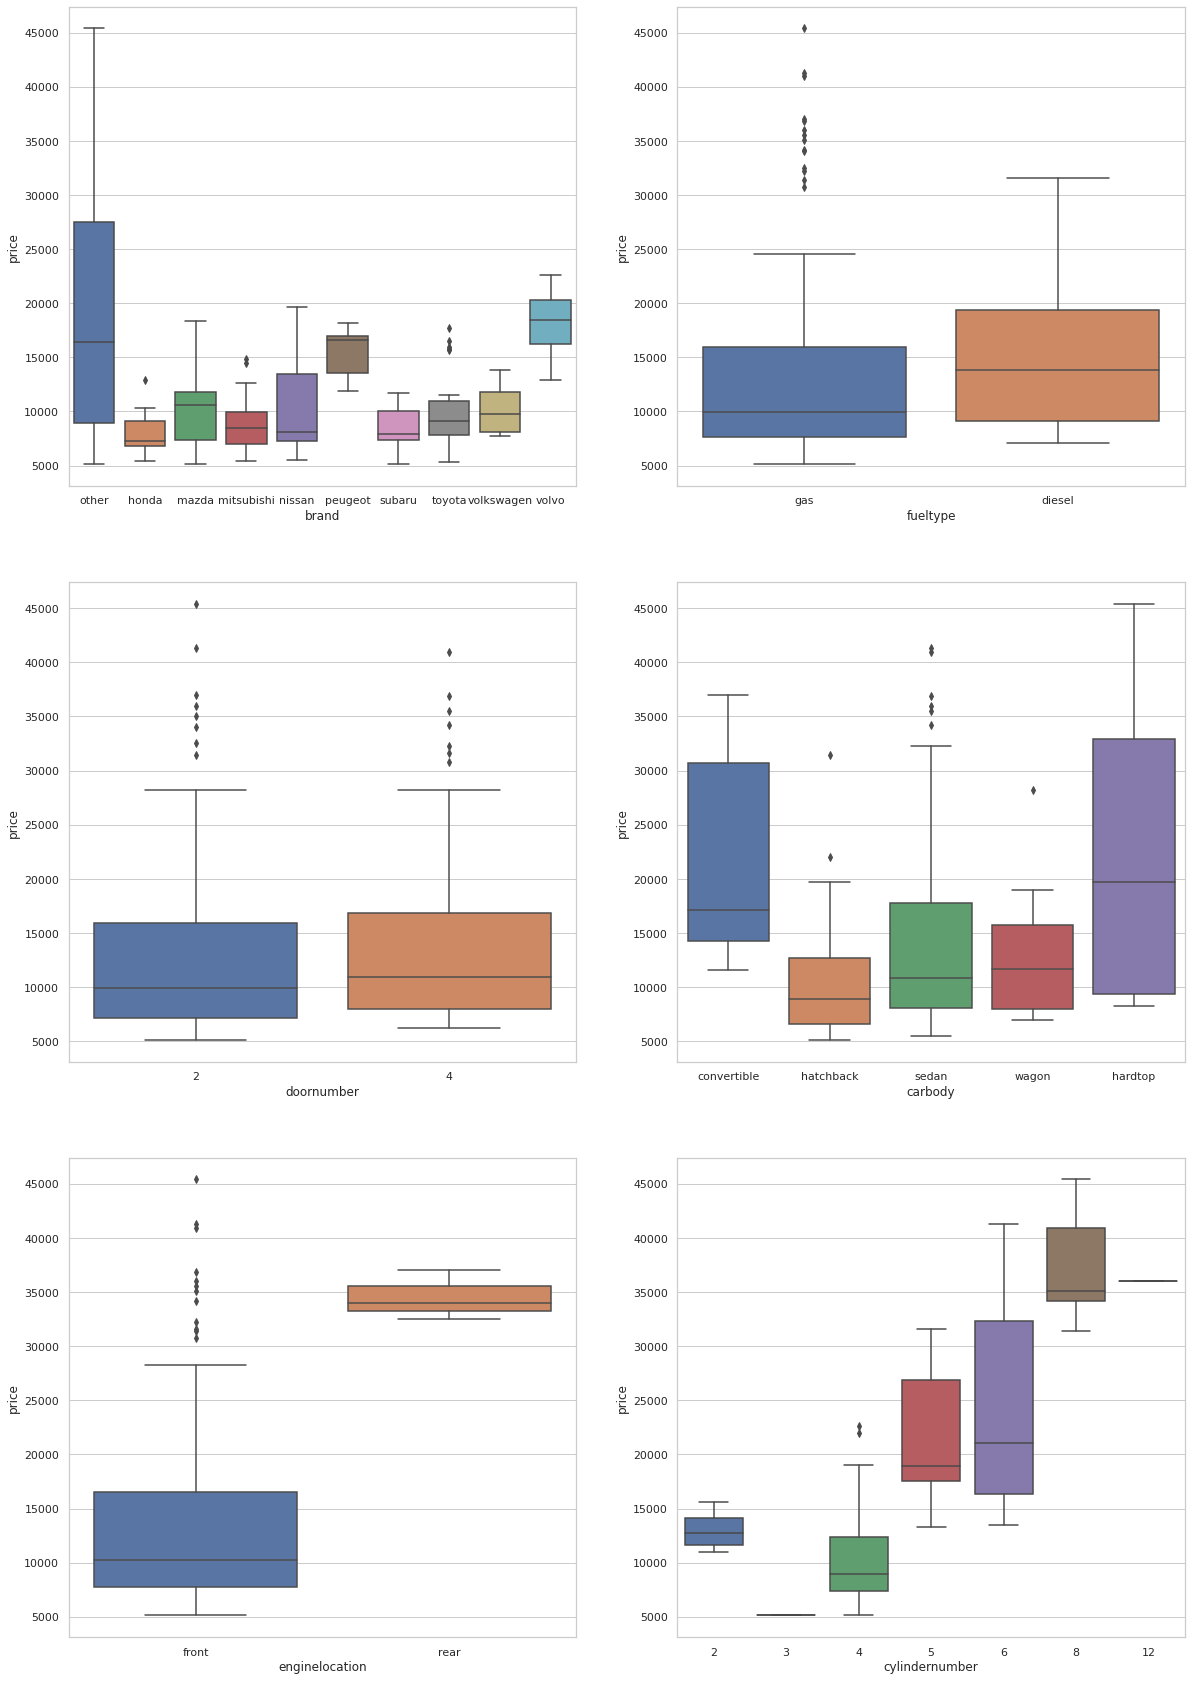

In [16]:
box_plot_two_vars(cars_data, [['brand', 'price'], ['fueltype','price'], ['doornumber', 'price'], ['carbody', 'price'], ['enginelocation', 'price'], ['cylindernumber', 'price']])

Realizamos una visualización similar, pero esta vez queremos tener en cuenta la presencia de sesgos dada la cantidad de datos que hay dentro del valor de un valor o categoría dada.

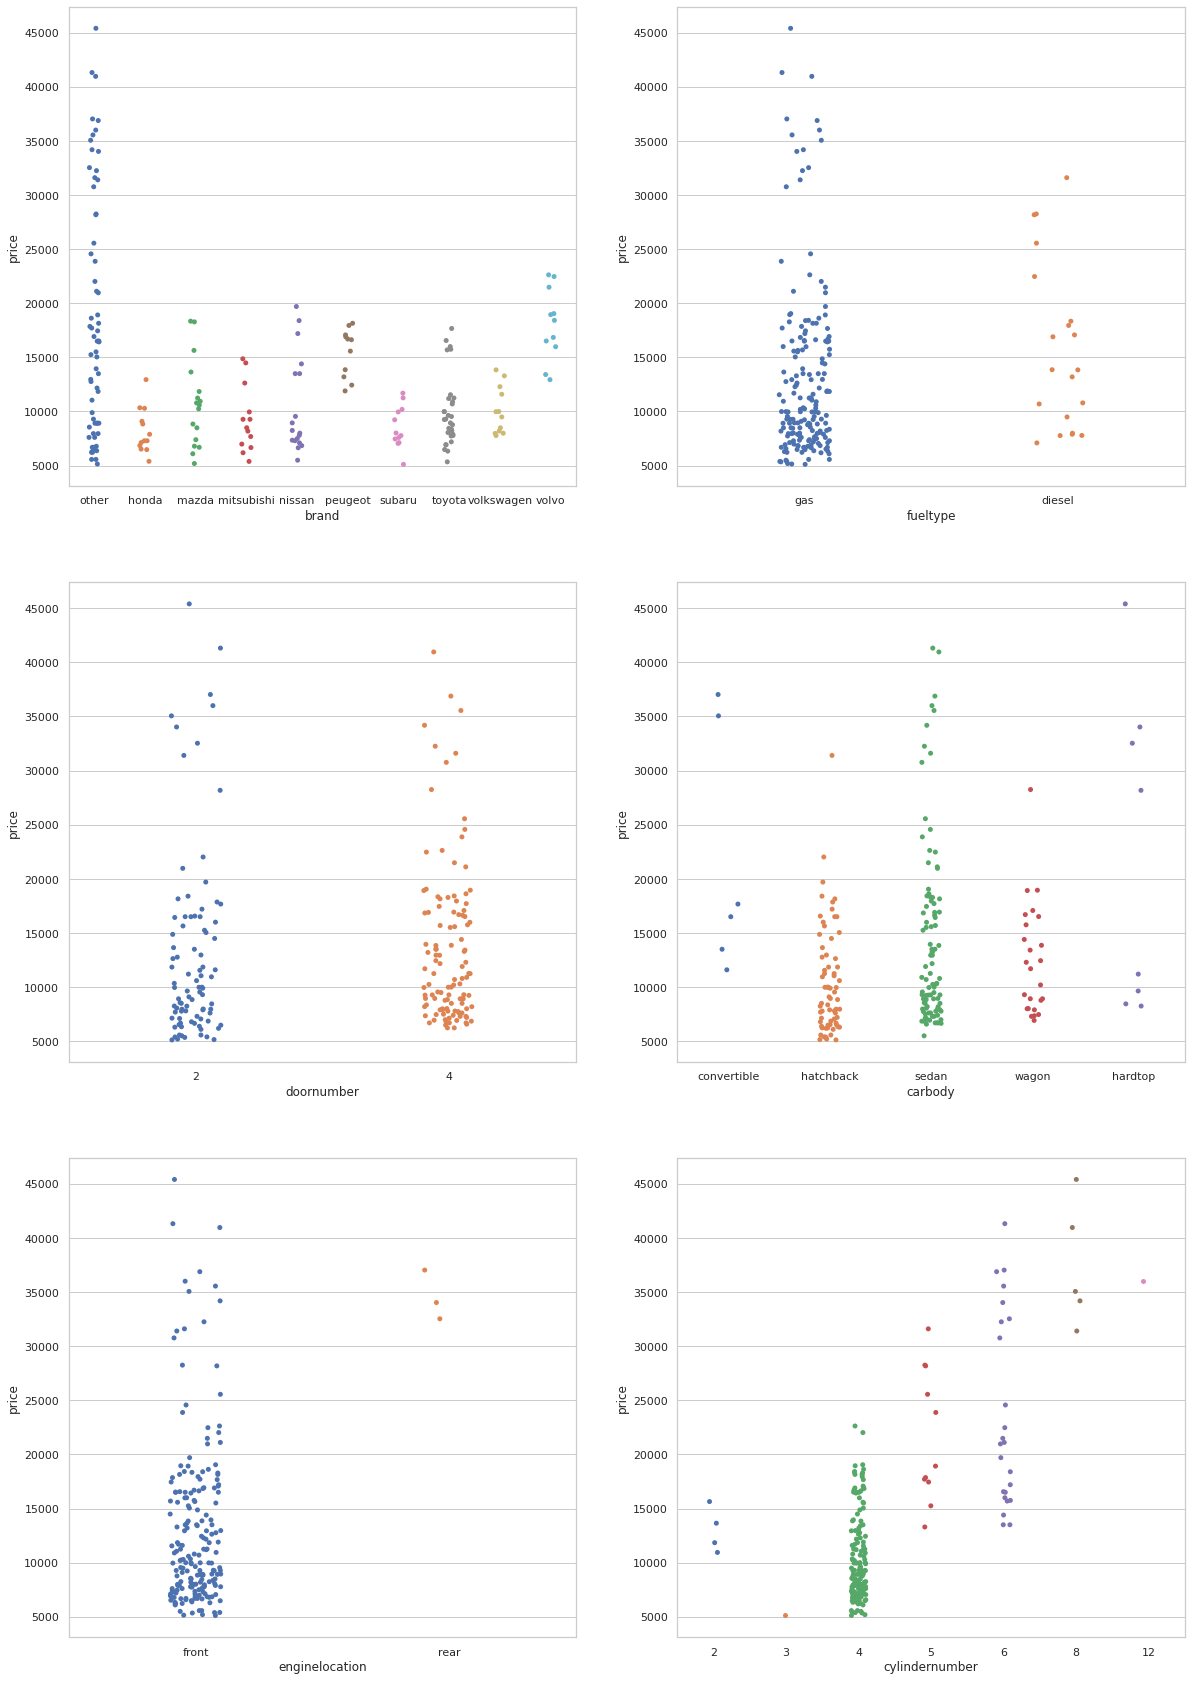

In [17]:
cat_plot_two_vars(cars_data, [['brand', 'price'], ['fueltype','price'], ['doornumber', 'price'], ['carbody', 'price'], ['enginelocation', 'price'], ['cylindernumber', 'price']])

Realizamos una visualización interactiva para de los caballos del coche con su precio para poder familiarizarnos con el dataset.

In [18]:
import plotly.express as px
fig = px.scatter(cars_data, x="horsepower", y="price", color="brand", hover_data = ['CarName', 'price', 'horsepower', 'brand', 'carbody', 'cylindernumber'])
fig.show()

Realizamos dos pairplots para visualizar las relaciones entre pares de variables continuas y discretas.

* El primero usa el color para representar la marca del coche.
* El segundo no usa ningún color.

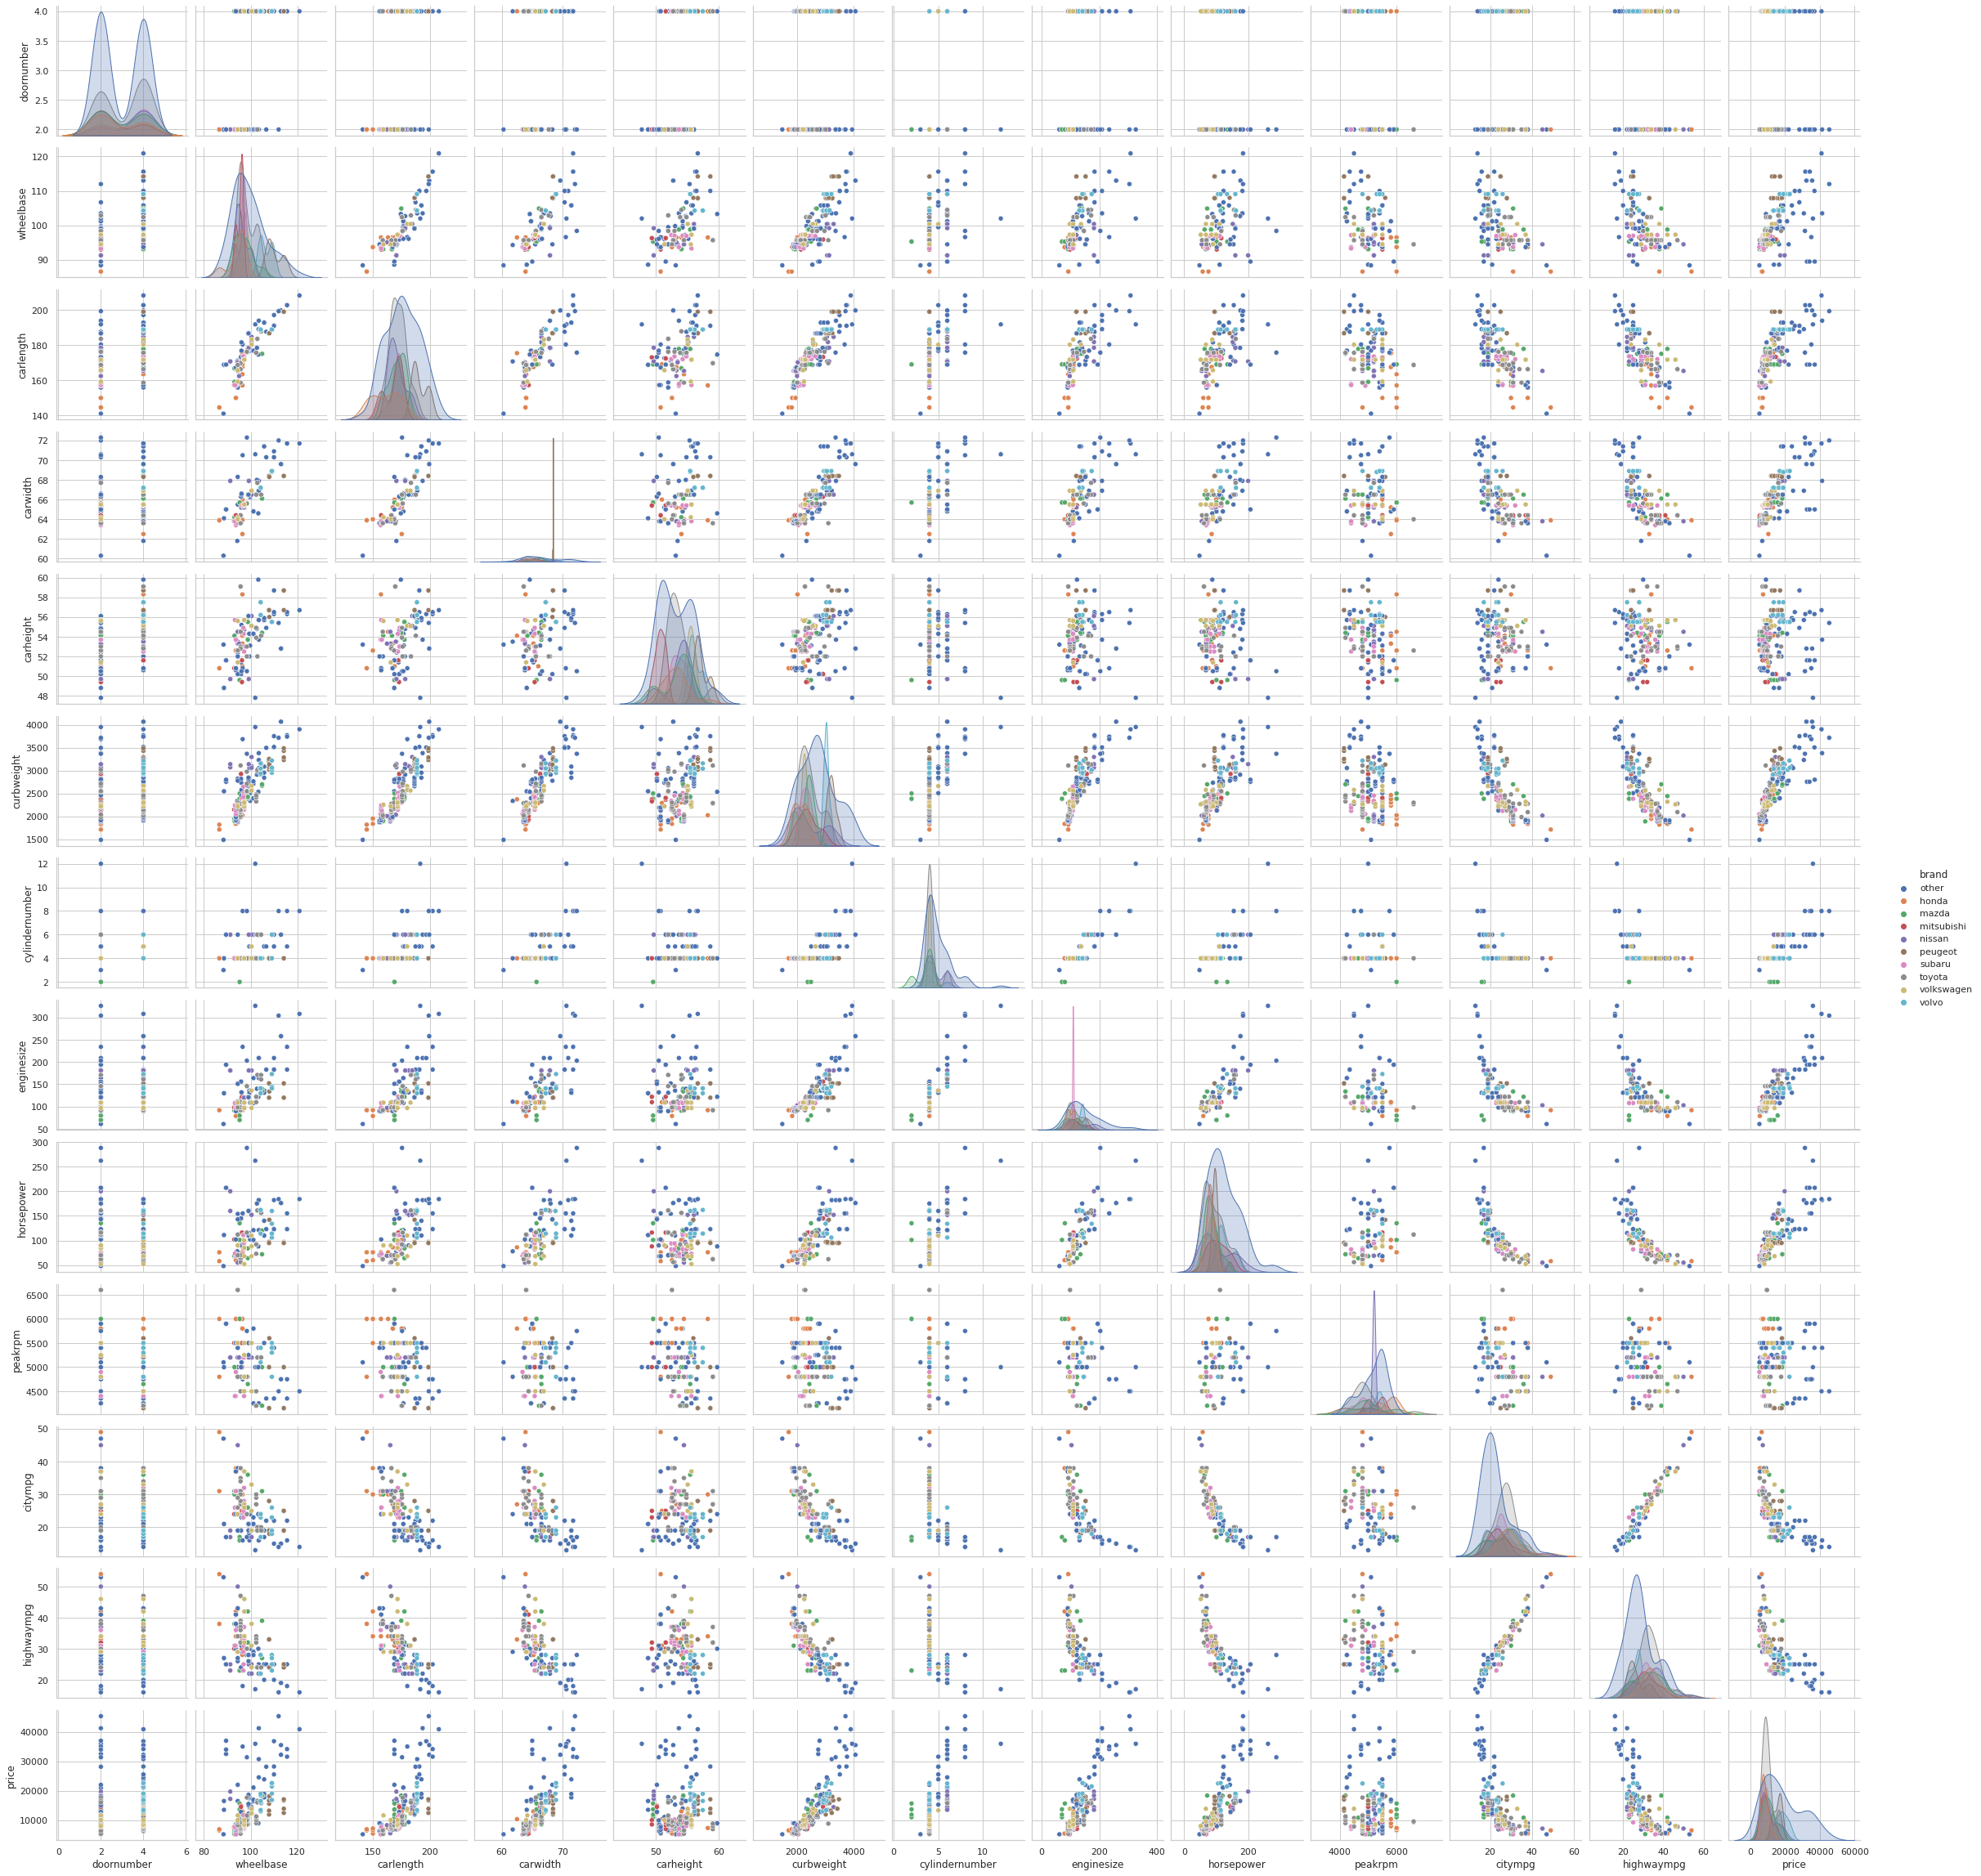

In [19]:
import seaborn as sns

sns.pairplot(cars_data, hue='brand')

Realizamos una matríz de correlación usando el método de "Pearson" para encontrar las variables que presentan una correlación lineal más fuerte.

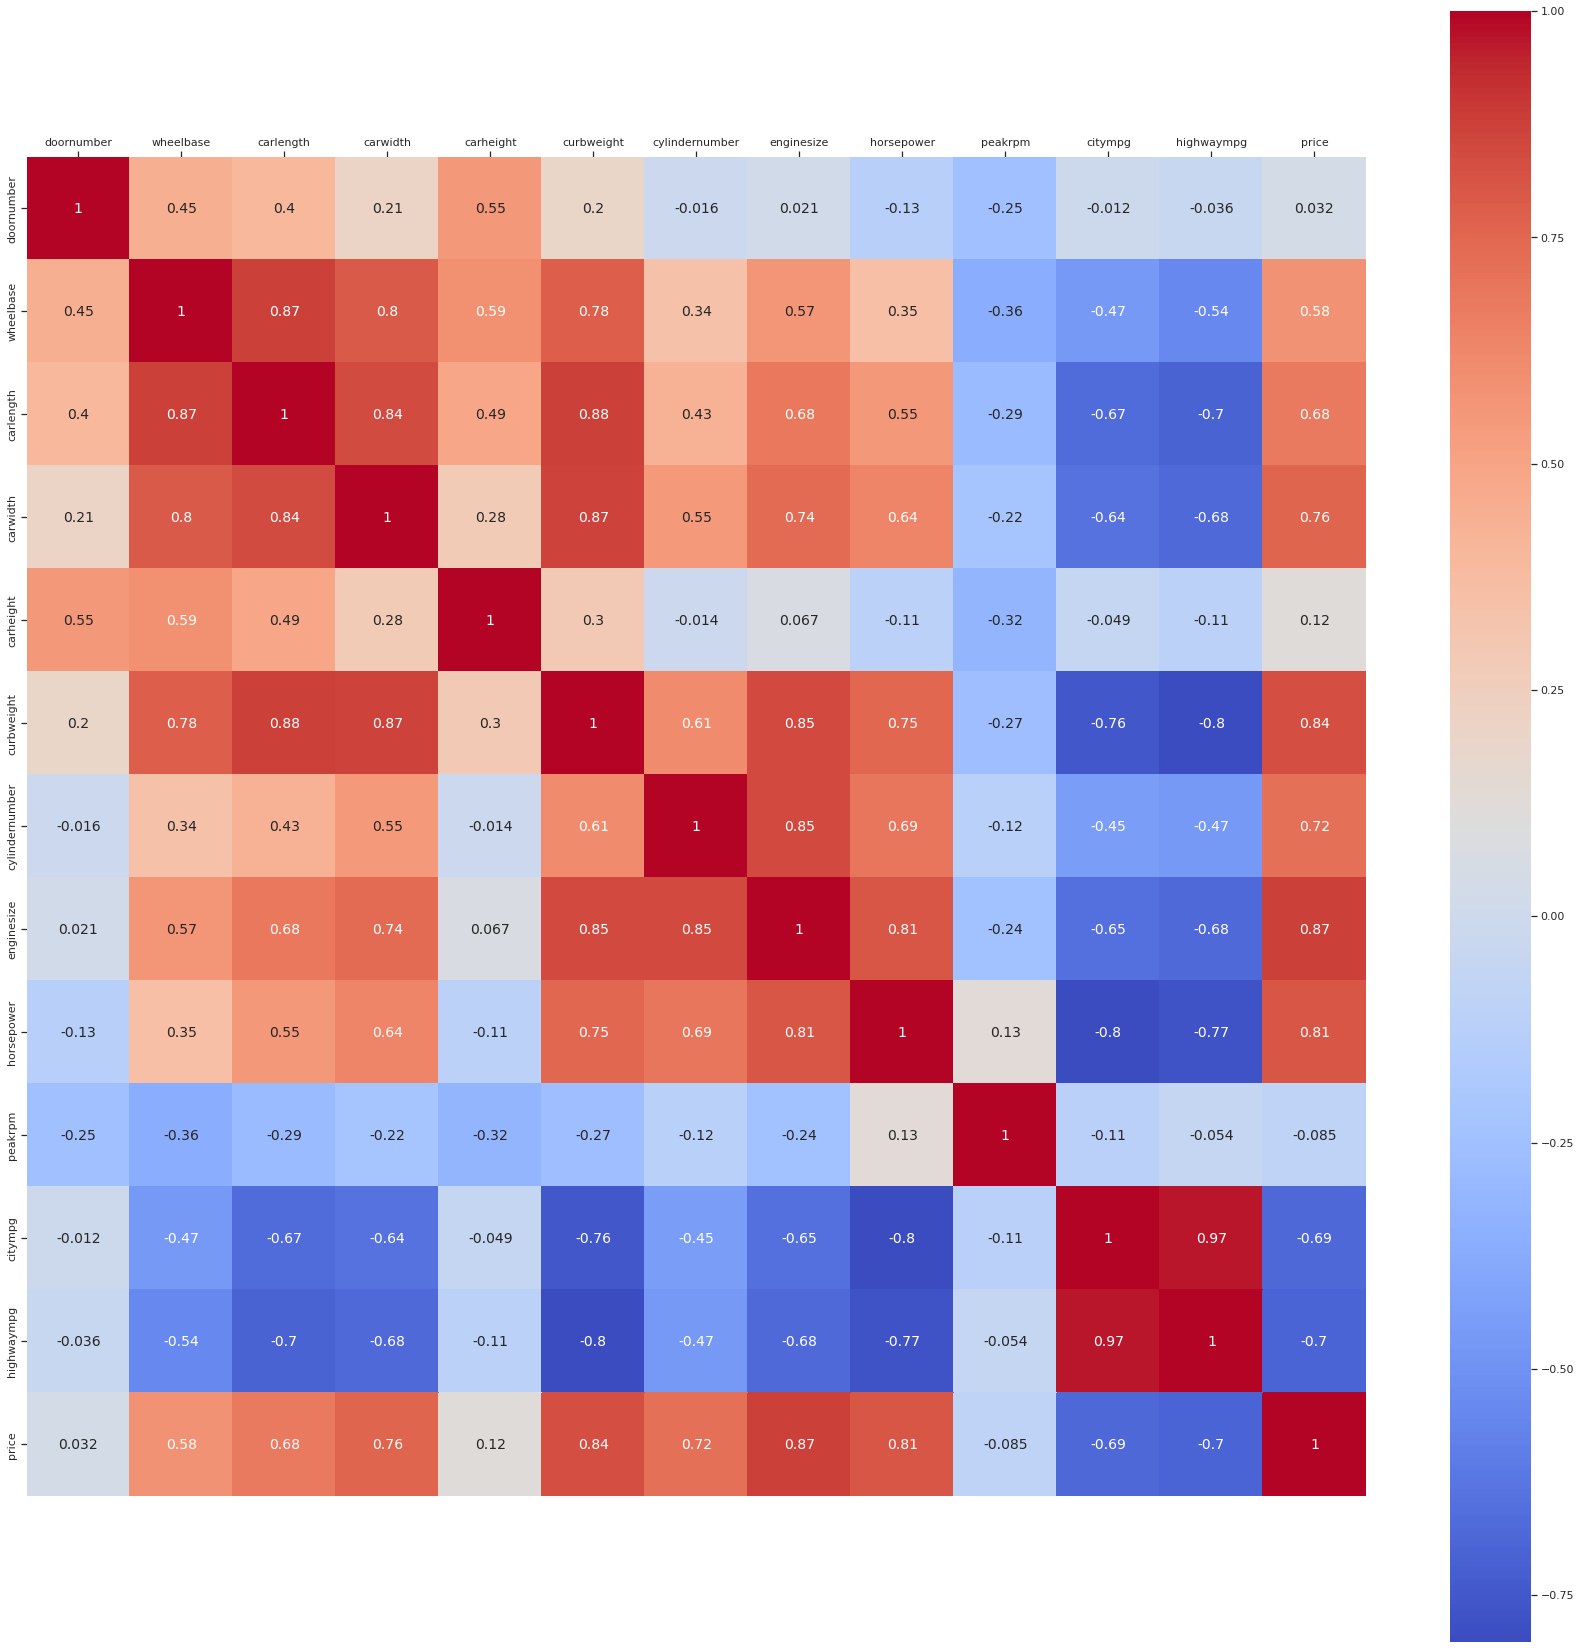

In [20]:
def plot_correlation_matrix(corr_matrix, fig_size = (30,30)):

  def shorten_big_col_name(col_name):
    if len(col_name)>15:
      return col_name[0:14] + '.'
    else:
      return col_name


  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  import math

  fig, ax = plt.subplots(nrows=1, figsize=fig_size)
  sns.heatmap(corr_matrix, ax=ax, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

  ax.xaxis.tick_top()
  shorten_x_labels = [shorten_big_col_name(item.get_text()) for item in ax.get_xticklabels()]
  ax.set_xticklabels(shorten_x_labels)

  ax.xaxis.set_label_position('top') 
  ax.yaxis.tick_left()
  shorten_y_labels = [shorten_big_col_name(item.get_text()) for item in ax.get_yticklabels()]
  ax.set_yticklabels(shorten_y_labels)
  

plot_correlation_matrix(cars_data.corr(method='pearson'))

Realizamos un ranking de las variables más correlacionadas (en valor absoluto)

In [21]:
corr_ranking = cars_data.corr(method='pearson').abs().unstack().sort_values(kind="quicksort", ascending=False)\
                            .reset_index().rename(columns={'level_0' : 'variable_X', 'level_1': 'variable_Y', 0 : 'Corr'})
corr_ranking.drop(corr_ranking.iloc[1::2].index)[corr_ranking['Corr'] <1].head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



variable_X  variable_Y      Corr
14         citympg  highwaympg  0.971337
16      curbweight   carlength  0.877728
18       carlength   wheelbase  0.874587
20      enginesize       price  0.874145
22        carwidth  curbweight  0.867032
24      curbweight  enginesize  0.850594
26  cylindernumber  enginesize  0.846031
28        carwidth   carlength  0.841118
30           price  curbweight  0.835305
32      horsepower  enginesize  0.809769
34           price  horsepower  0.808139
36         citympg  horsepower  0.801456
38      curbweight  highwaympg  0.797465
40        carwidth   wheelbase  0.795144
42       wheelbase  curbweight  0.776386
44      horsepower  highwaympg  0.770544
46        carwidth       price  0.759325
48      curbweight     citympg  0.757414
50      horsepower  curbweight  0.750739
52        carwidth  enginesize  0.735433

### Regresión

#### Problema 1 - Adivina el precio del coche a partir de sus caballos de potencia

Seleccionamos las variables de interés.

In [22]:
problem1_data = cars_data[['horsepower', 'price']]
problem1_data

horsepower    price
0           111  13495.0
1           111  16500.0
2           154  16500.0
3           102  13950.0
4           115  17450.0
..          ...      ...
200         114  16845.0
201         160  19045.0
202         134  21485.0
203         106  22470.0
204         114  22625.0

[205 rows x 2 columns]

Visualizamos la relación entre las dos variables en sus dos dimensiones.

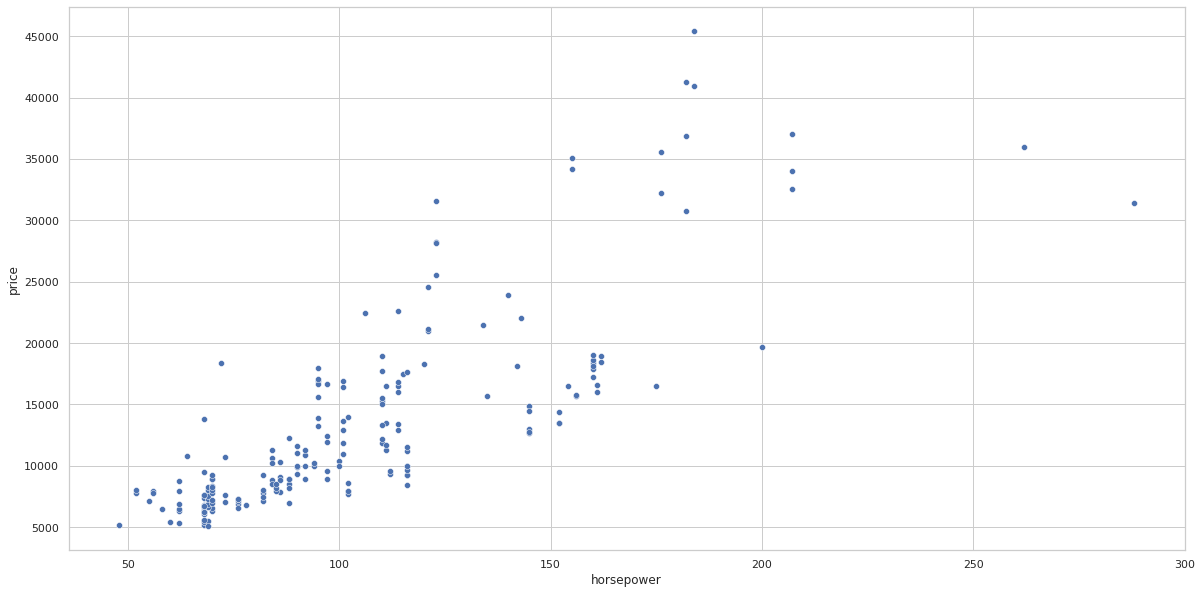

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, _ = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

sns.scatterplot(data = cars_data, x = 'horsepower', y = 'price')

Separamos variables predictoras (solo 'hoursepower') y la objetivo ('price') y también separamos el dataset en el set de train y de test. 

In [24]:
from sklearn.model_selection import train_test_split

datos_predictores = problem1_data[['horsepower']]
datos_objetivo = problem1_data[['price']]

#test_size hace referencia a cómo de grande queremos que sea el set de test en proporción al total (1) vamos a coger 1/5 = 0.2 approx
pred_train, pred_test, obj_train, obj_test = train_test_split(datos_predictores, datos_objetivo, test_size=0.2, random_state=42)

print("Tamaño de set de entrenamiento: [{0}] y de prueba [{1}]".format(len(pred_train), len(pred_test)))

Tamaño de set de entrenamiento: [164] y de prueba [41]


Visualizamos los puntos que van a representar el set de datos de:

* Train (azul)
* Test (verde)

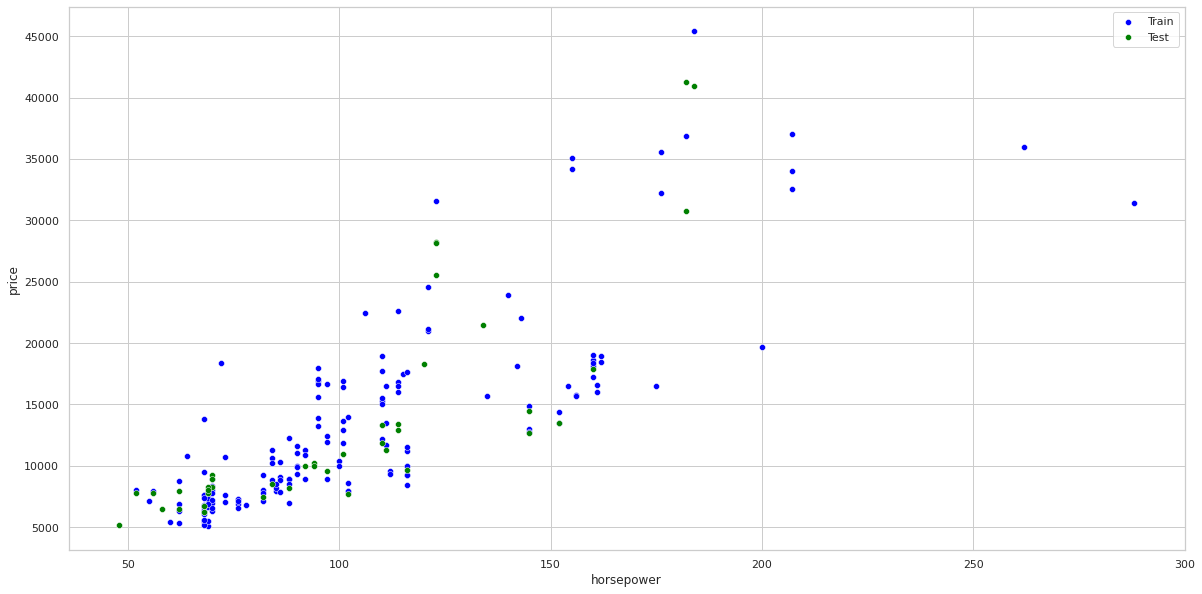

In [25]:
fig, _ = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

train_data = pd.concat([pred_train, obj_train], axis=1)
test_data = pd.concat([pred_test, obj_test], axis=1)

sns.scatterplot(data = train_data, x = 'horsepower', y = 'price', color = 'blue', label="Train")
sns.scatterplot(data = test_data, x = 'horsepower', y = 'price', color = 'green', label="Test")

##### Regresión lineal

Entrenamos el modelo de regresión lineal

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(pred_train, obj_train)

lin_reg.score(pred_train, obj_train)

0.6576989740290614

Visualizamos el resultado del modelo en el contexto del problema a solucionar junto con su error RMSE bajo el set de test.

In [27]:
!wget https://miro.medium.com/max/1222/1*jopCO2kMEI84s6fiGKdXqg.png

--2022-07-26 19:30:41--  https://miro.medium.com/max/1222/1*jopCO2kMEI84s6fiGKdXqg.png
Resolving miro.medium.com (miro.medium.com)... 162.159.152.4, 162.159.153.4, 2606:4700:7::a29f:9804, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.152.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23048 (23K) [image/png]
Saving to: ‘1*jopCO2kMEI84s6fiGKdXqg.png.1’

1*jopCO2kMEI84s6fiG 100%[===================>]  22.51K  --.-KB/s    in 0s      

2022-07-26 19:30:41 (71.8 MB/s) - ‘1*jopCO2kMEI84s6fiGKdXqg.png.1’ saved [23048/23048]



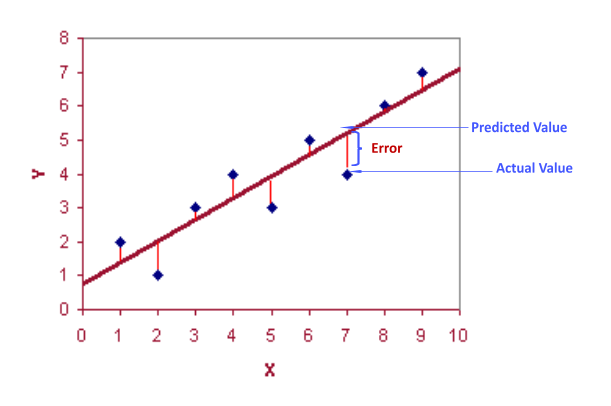

In [28]:
Image('/content/1*jopCO2kMEI84s6fiGKdXqg.png')

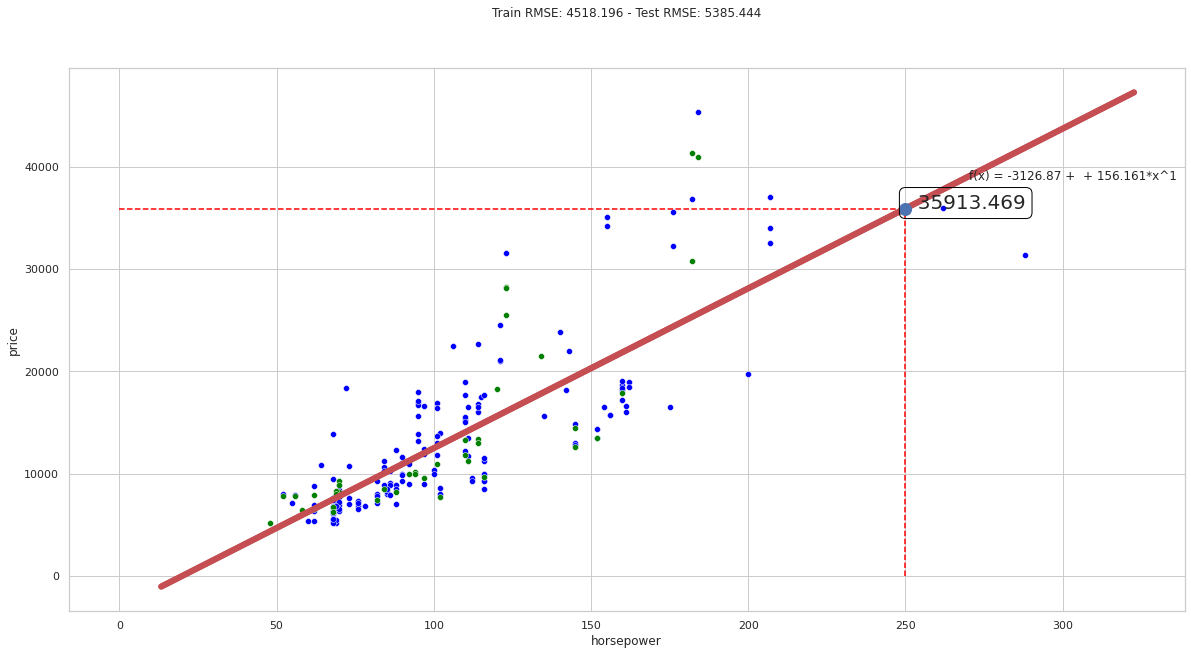

In [29]:
def plot_2D_regression_result(model, train_data, test_data, pred_var, targ_var, user_input=None, poly_transf=None):
  import seaborn as sns
  import matplotlib.pyplot as plt
  from sklearn.metrics import mean_squared_error
  import numpy as np

  def get_regression_formula(coefs, intercept):
    formula = ''
    for i, coef in enumerate(coefs):
      formula = formula + ' + {0}*x^{1}'.format(round(coef, 3), i+1)
    
    formula = 'f(x) = {0} + {1}'.format(round(intercept, 3), formula)
    return formula

  fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

  sns.scatterplot(data = train_data, x = pred_var, y = targ_var, color = 'blue', ax=ax)
  sns.scatterplot(data = test_data, x = pred_var, y = targ_var, color = 'green', ax=ax)

  all_data = pd.concat([train_data, test_data], axis= 0)


  x = np.linspace(all_data[pred_var].min() - all_data[pred_var].mean()/3, all_data[pred_var].max() + all_data[pred_var].mean()/3, 1000)
  x = pd.DataFrame(np.array([x]).T, columns=[pred_var])

  if poly_transf is not None:
    x_transf = poly_transf.transform(x)
    y = model.predict(x_transf)
    plt.plot(x,y, 'r', linewidth=6)
  else:
    y = model.predict(x)
    plt.plot(x,y, 'r', linewidth=6)

  plt.plot(x[0:],y, 'r', linewidth=6)

  test_input = test_data[[pred_var]] if poly_transf is None else poly_transf.transform(test_data[[pred_var]])
  train_input = train_data[[pred_var]] if poly_transf is None else poly_transf.transform(train_data[[pred_var]])
  plt.text(0.5, 1.1, 'Train RMSE: {0} - Test RMSE: {1}'.format(round(mean_squared_error(model.predict(train_input), train_data[targ_var], squared = False), 3), round(mean_squared_error(model.predict(test_input), test_data[targ_var], squared = False), 3)),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
  

  if user_input is not None:
    user_input_transf = pd.DataFrame([[user_input]], columns=[pred_var]) if poly_transf is None else poly_transf.transform(pd.DataFrame([[user_input]], columns=[pred_var])) 
    user_pred = model.predict(user_input_transf)
    ax.hlines(y=user_pred, xmin = 0,  xmax = user_input, color='red', linestyle='--')
    ax.vlines(x=user_input, ymin = 0, ymax=user_pred, color='red', linestyle='--')
    plt.plot(user_input,user_pred,'bo',  markersize=12) 
    ax.annotate('  {0}'.format(round(np.ravel(user_pred)[0], 3)), (user_input, user_pred), fontsize=20,
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))
  
  if isinstance(model, LinearRegression):
    plt.text(0.9, 0.8, get_regression_formula(model.coef_[0], model.intercept_[0]),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

plot_2D_regression_result(lin_reg, train_data, test_data, 'horsepower', 'price', user_input=250)

##### Árbol de regresión

Entrenamos el modelo de regresión.

In [30]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(random_state=42).fit(pred_train, obj_train)

Visualizamos el árbol de regresión entrenado.

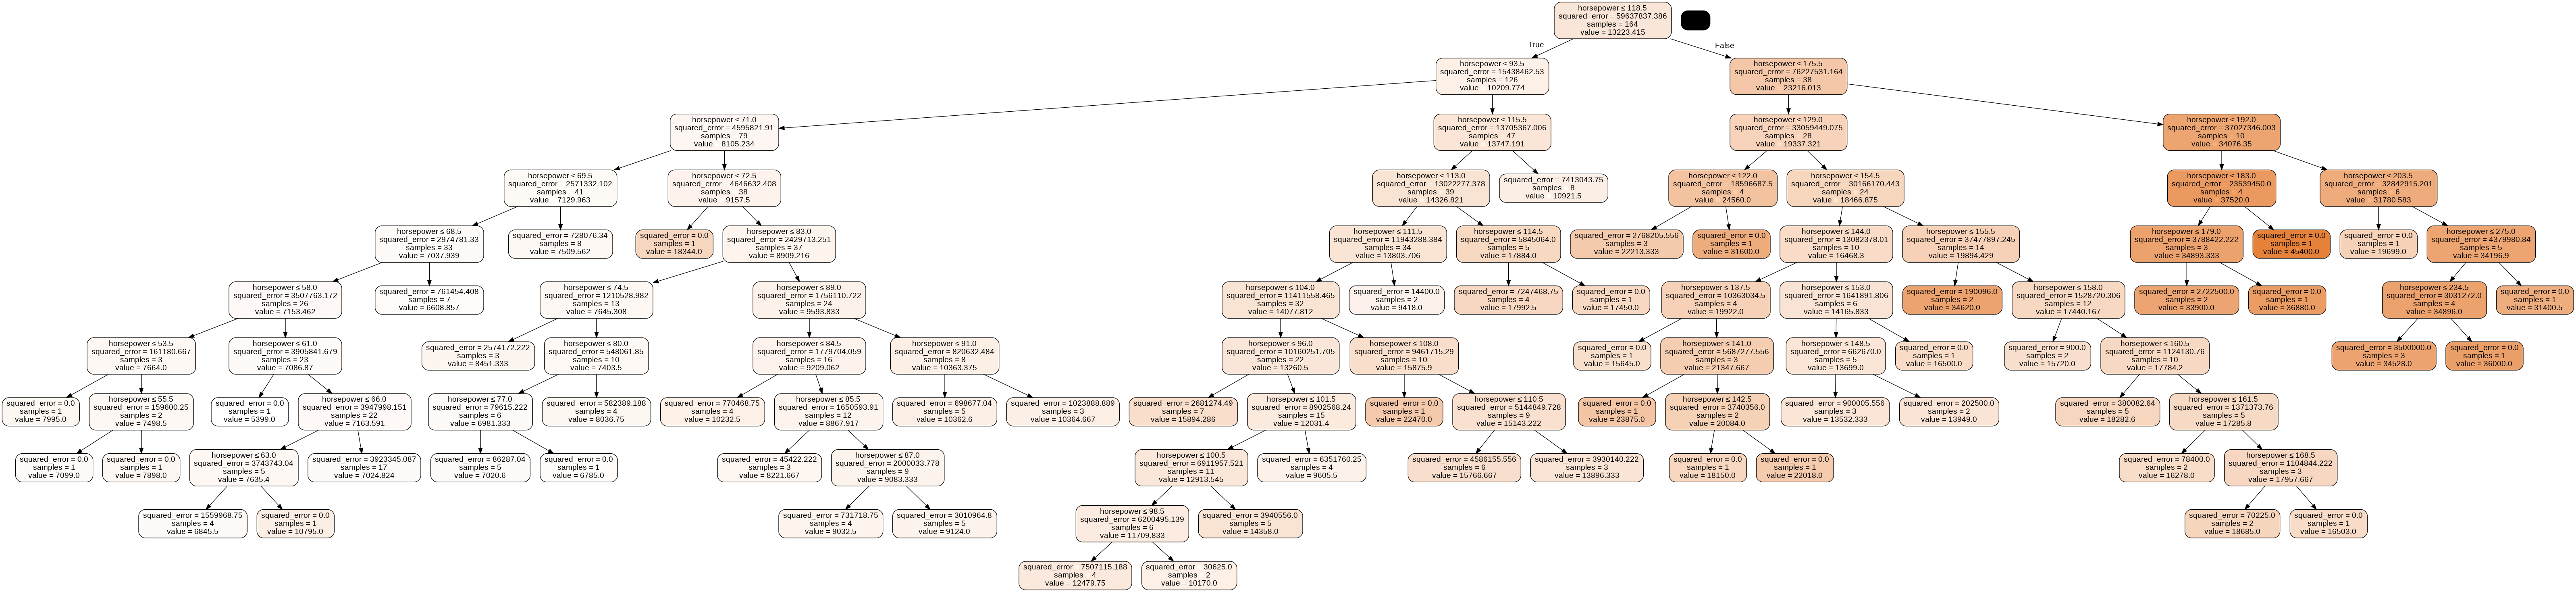

In [31]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(reg_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = pred_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('classif_tree_titanic.png')
Image(graph.create_png())

Visualizamos el resultado que produce el árbol de regresión en contexto del problema dado.

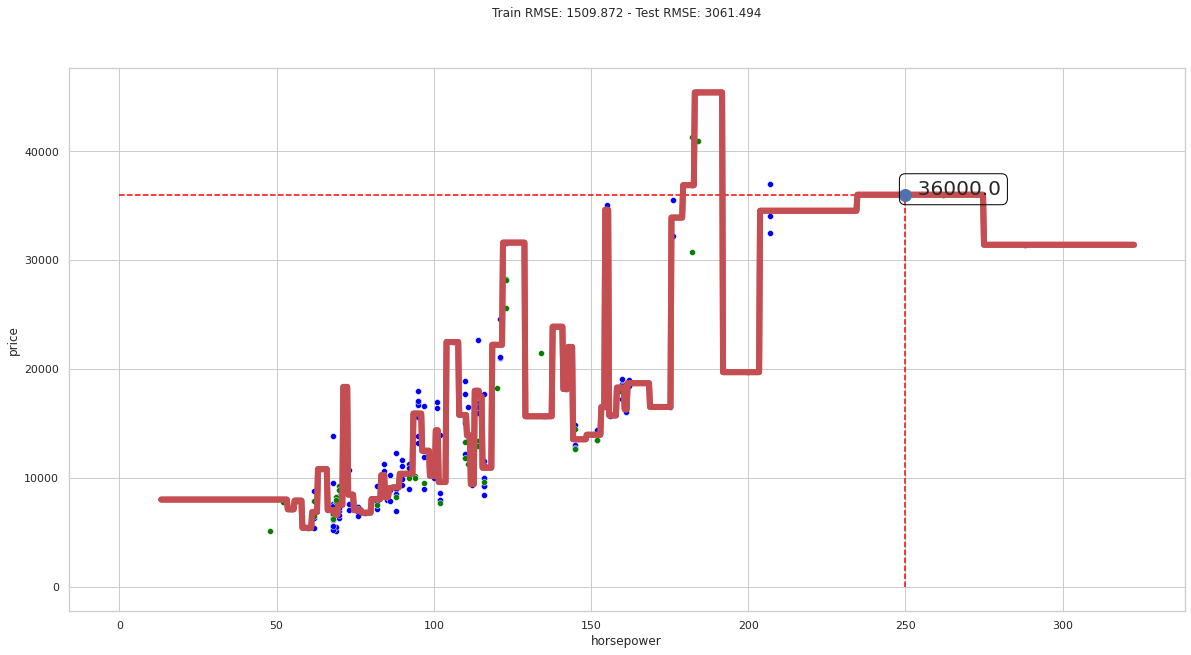

In [32]:
plot_2D_regression_result(reg_tree, train_data, test_data, 'horsepower', 'price', user_input=250)

En vista de que el modelo está sobreajustando, creamos otro árbol limitando su profundidad máxima.

In [33]:
from sklearn.tree import DecisionTreeRegressor

reg_tree_depth = DecisionTreeRegressor(random_state=42, max_depth=3).fit(pred_train, obj_train)

Visualizamos el árbol entrenado así como el resultado que produce en el problema actual.



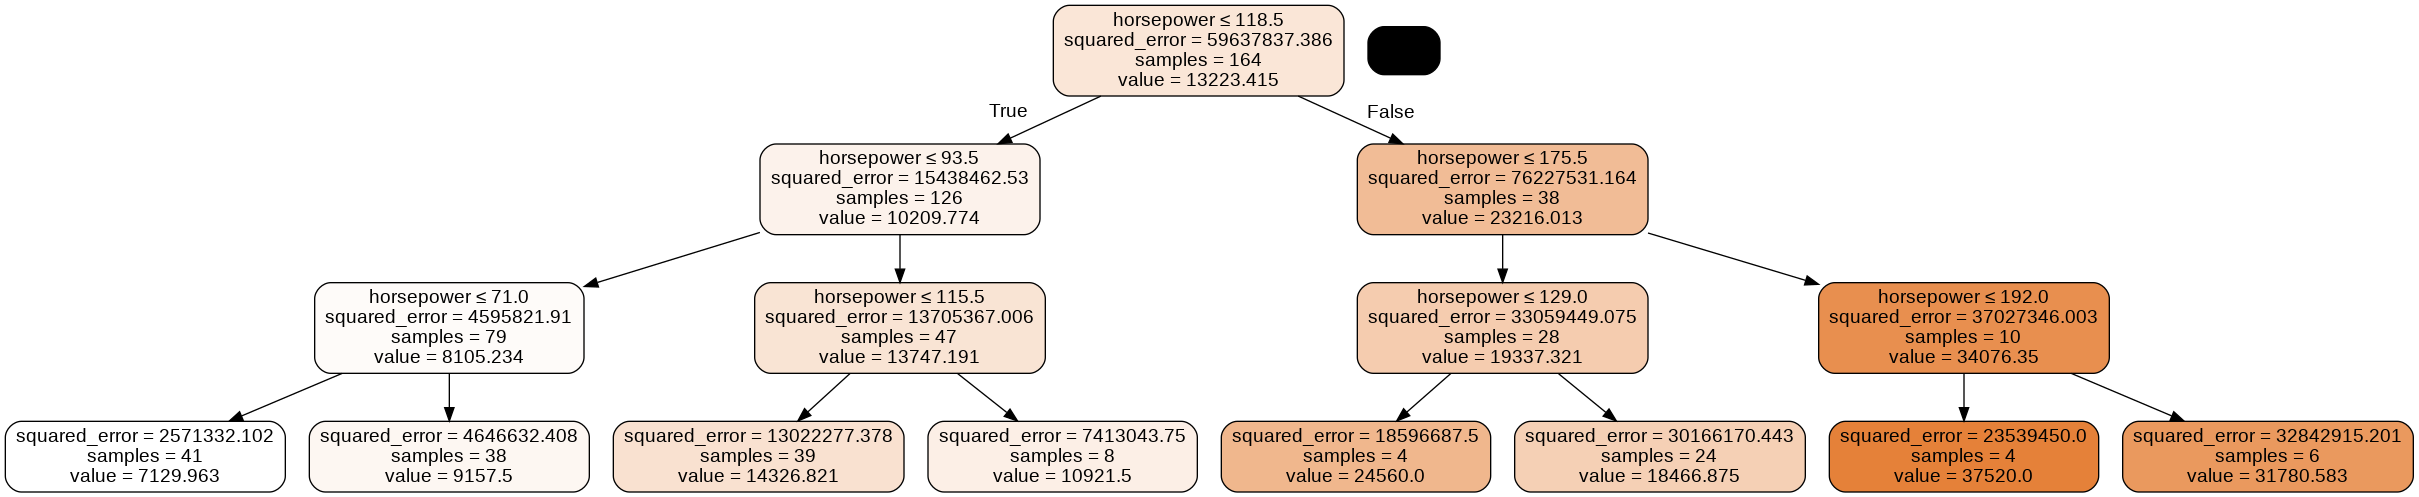

In [34]:
dot_data = StringIO()
export_graphviz(reg_tree_depth, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = pred_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('classif_tree_titanic.png')
Image(graph.create_png())

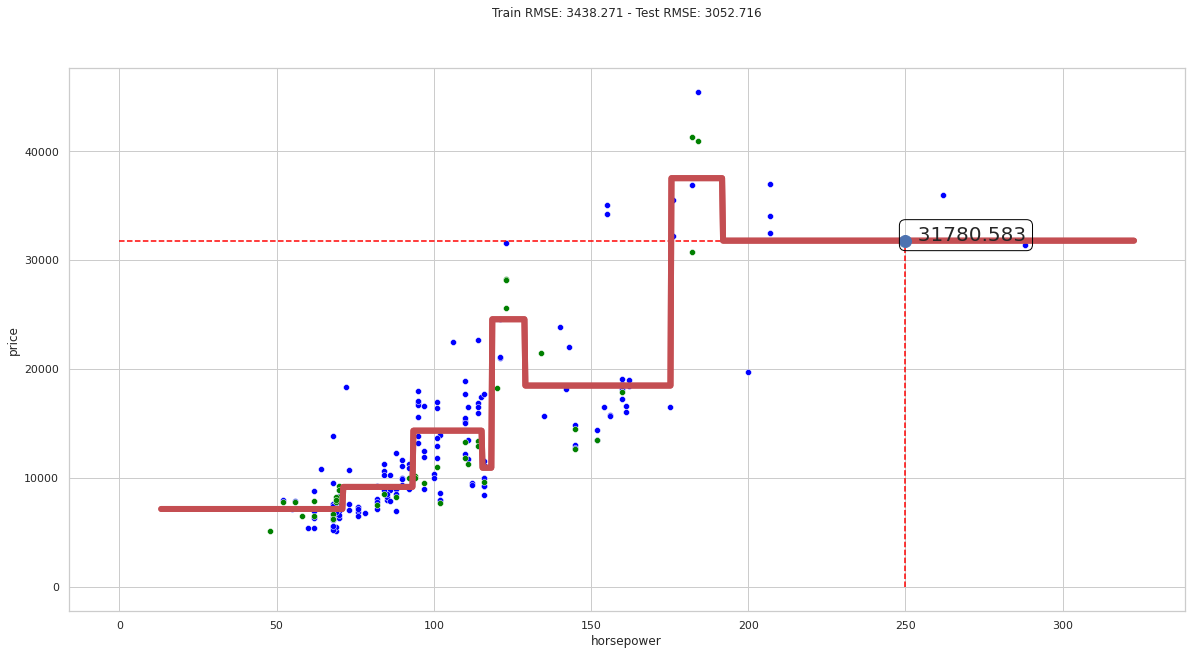

In [35]:
plot_2D_regression_result(reg_tree_depth, train_data, test_data, 'horsepower', 'price', user_input=250)

##### XGBoost

Creamos y entrenamos el modelo XGboost

In [36]:
import xgboost as xgb

xg_boost = xgb.XGBRegressor(max_depth = 5, n_estimators = 250, random_state= 4)

evalset = [(pred_train, obj_train), (pred_test, obj_test)]
# Fit
xg_boost = xg_boost.fit(pred_train, obj_train.values.ravel(), eval_metric=["rmse"], eval_set=evalset, verbose = True)

[19:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13943.3	validation_1-rmse:14718.5
[1]	validation_0-rmse:12713	validation_1-rmse:13429.3
[2]	validation_0-rmse:11609.7	validation_1-rmse:12265.8
[3]	validation_0-rmse:10619.7	validation_1-rmse:11224.5
[4]	validation_0-rmse:9734.14	validation_1-rmse:10292.8
[5]	validation_0-rmse:8944.76	validation_1-rmse:9457.93
[6]	validation_0-rmse:8240.4	validation_1-rmse:8716.39
[7]	validation_0-rmse:7610.56	validation_1-rmse:8049.09
[8]	validation_0-rmse:7028.94	validation_1-rmse:7433.47
[9]	validation_0-rmse:6507.64	validation_1-rmse:6882.32
[10]	validation_0-rmse:6041.7	validation_1-rmse:6389.76
[11]	validation_0-rmse:5620.68	validation_1-rmse:5953.43
[12]	validation_0-rmse:5243.45	validation_1-rmse:5566.59
[13]	validation_0-rmse:4906.28	validation_1-rmse:5222.76
[14]	validation_0-rmse:4609.52	validation_1-rmse:4904.67
[15]	validation_0-rmse:4326.35	v

Visualizamos cómo evoluciona el RMSE en cada iteración del XGboost (con cada árbol nuevo)

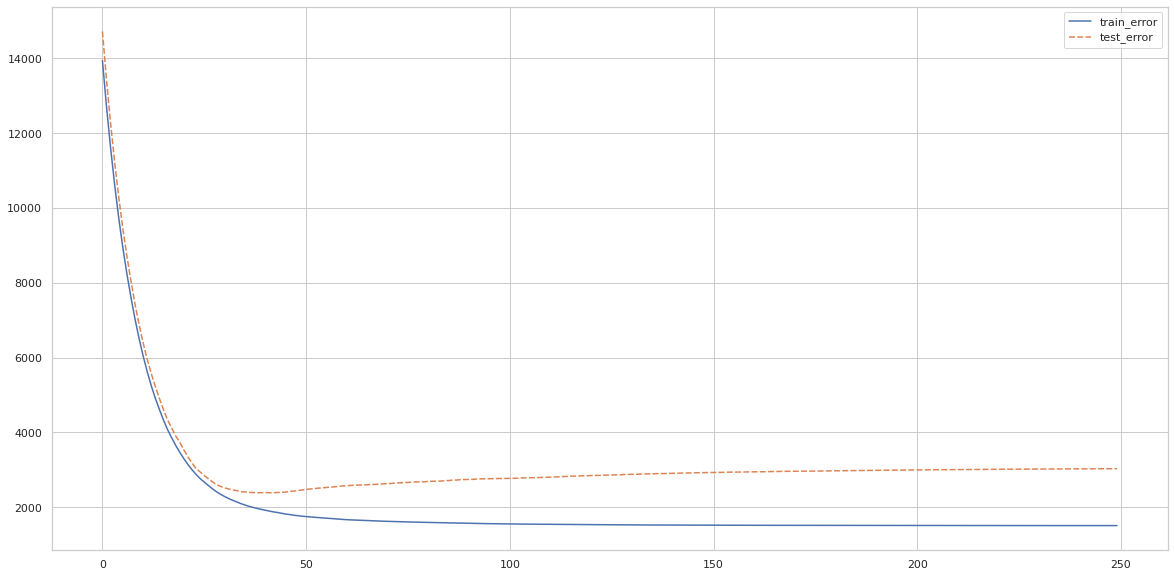

In [37]:
def plot_xgboost_training_results(train_results):
  import seaborn as sns
  import matplotlib.pyplot as plt

  results_df = pd.DataFrame()
  results_df['train_error'] = train_results['validation_0']['rmse']
  results_df['test_error'] = train_results['validation_1']['rmse']

  fig, ax = plt.subplots(nrows = 1, ncols = 1)
  
  fig.set_figheight(10)
  fig.set_figwidth(20)

  fig = sns.lineplot(data = results_df, ax=ax)


training_results = xg_boost.evals_result()
plot_xgboost_training_results(training_results)

Visualizamos cómo se comporta el resultado en el problema actual.

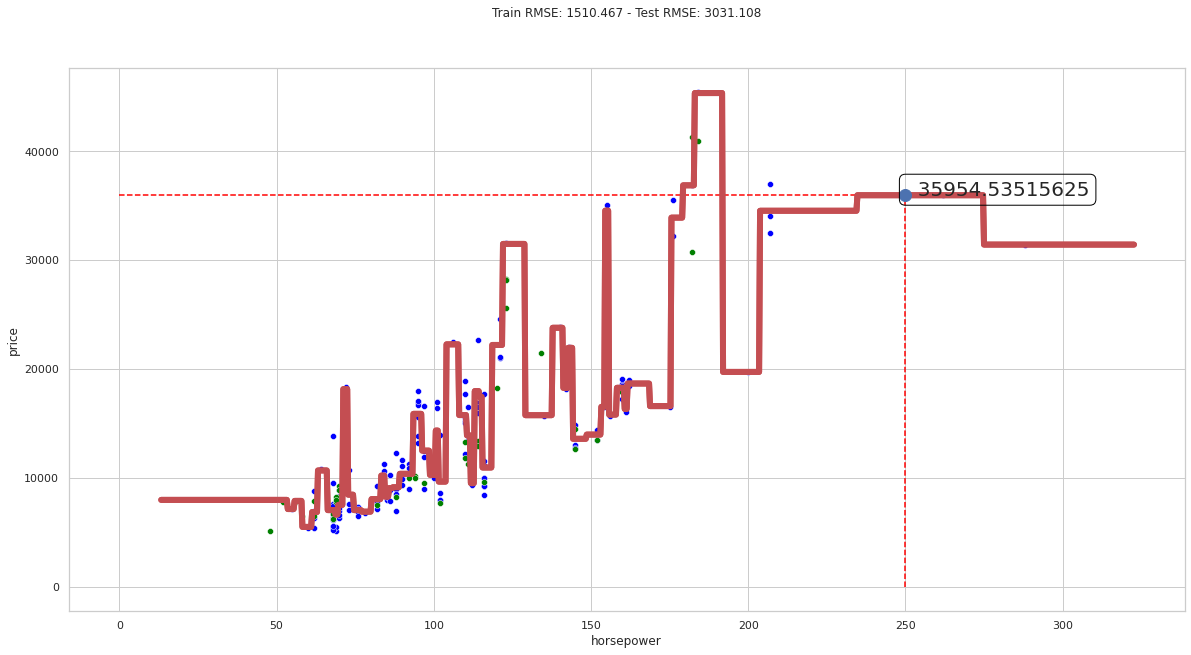

In [38]:
plot_2D_regression_result(xg_boost, train_data, test_data, 'horsepower', 'price', user_input=250)

En vista de que el modelo parece que está sobreajustando, reducimos el número de árboles de los que se compone el modelo.

In [39]:
import xgboost as xgb

xg_boost_less_trees = xgb.XGBRegressor(max_depth = 5, n_estimators = 25, random_state= 4)

evalset = [(pred_train, obj_train), (pred_test, obj_test)]
# Fit
xg_boost_less_trees = xg_boost_less_trees.fit(pred_train, obj_train.values.ravel(), eval_metric=["rmse"], eval_set=evalset, verbose = True)

[19:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13943.3	validation_1-rmse:14718.5
[1]	validation_0-rmse:12713	validation_1-rmse:13429.3
[2]	validation_0-rmse:11609.7	validation_1-rmse:12265.8
[3]	validation_0-rmse:10619.7	validation_1-rmse:11224.5
[4]	validation_0-rmse:9734.14	validation_1-rmse:10292.8
[5]	validation_0-rmse:8944.76	validation_1-rmse:9457.93
[6]	validation_0-rmse:8240.4	validation_1-rmse:8716.39
[7]	validation_0-rmse:7610.56	validation_1-rmse:8049.09
[8]	validation_0-rmse:7028.94	validation_1-rmse:7433.47
[9]	validation_0-rmse:6507.64	validation_1-rmse:6882.32
[10]	validation_0-rmse:6041.7	validation_1-rmse:6389.76
[11]	validation_0-rmse:5620.68	validation_1-rmse:5953.43
[12]	validation_0-rmse:5243.45	validation_1-rmse:5566.59
[13]	validation_0-rmse:4906.28	validation_1-rmse:5222.76
[14]	validation_0-rmse:4609.52	validation_1-rmse:4904.67
[15]	validation_0-rmse:4326.35	v

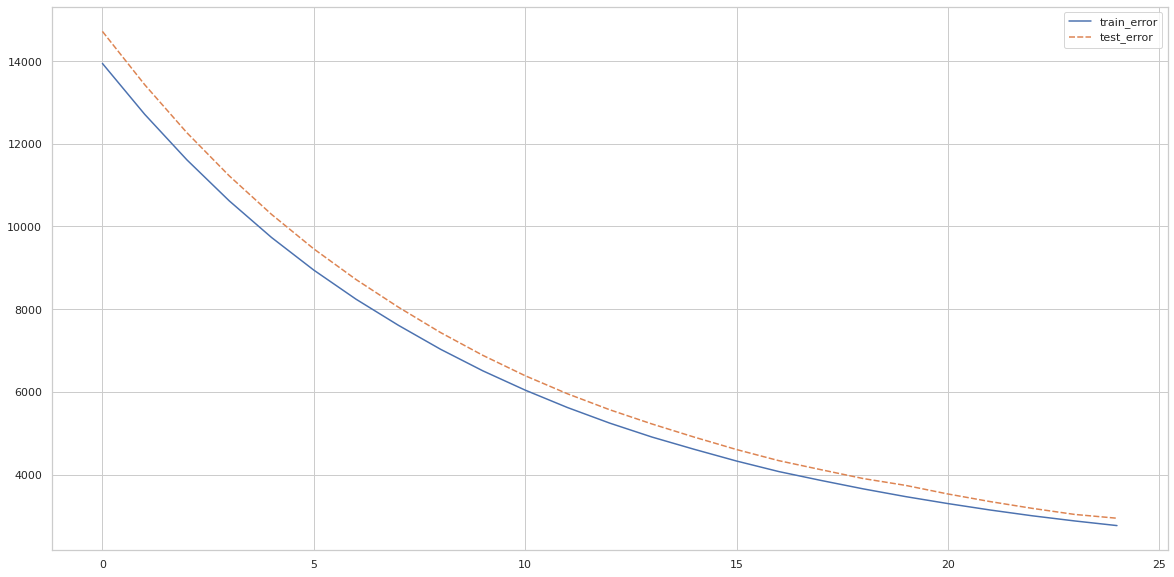

In [40]:
training_results = xg_boost_less_trees.evals_result()
plot_xgboost_training_results(training_results)

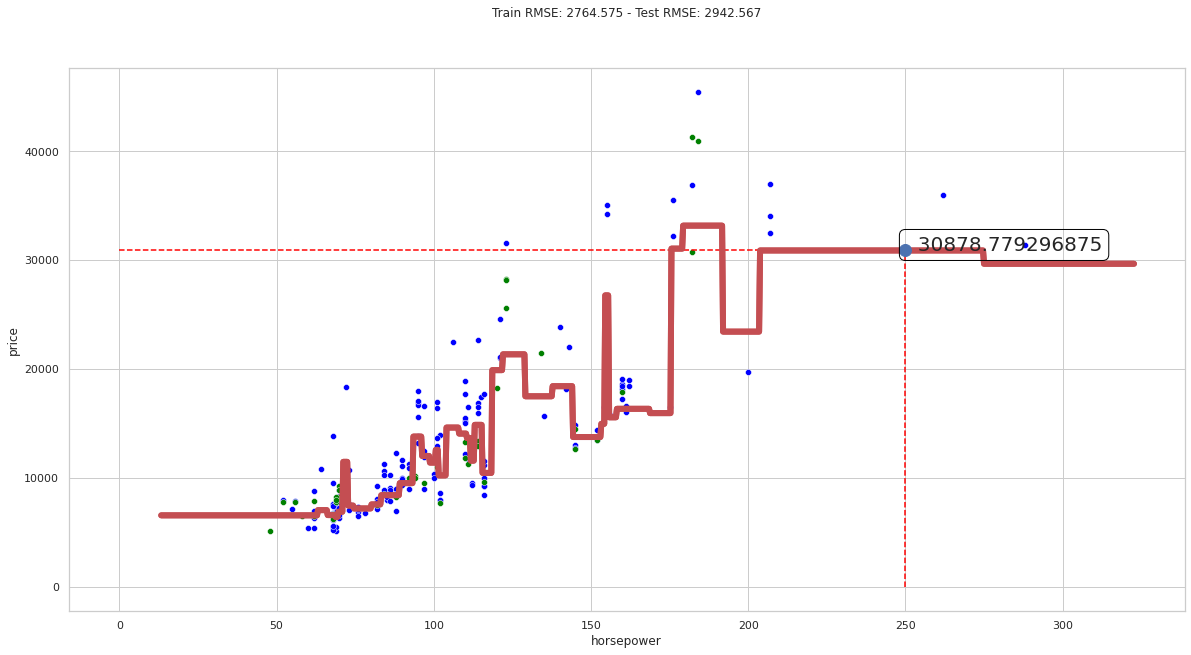

In [41]:
plot_2D_regression_result(xg_boost_less_trees, train_data, test_data, 'horsepower', 'price', user_input=250)

#### Problema 2 - Calculando citympg a partir de los caballos del coche

Seleccionamos las variables de interés.

In [42]:
problem2_data = cars_data[['horsepower', 'citympg']]
problem2_data

horsepower  citympg
0           111       21
1           111       21
2           154       19
3           102       24
4           115       18
..          ...      ...
200         114       23
201         160       19
202         134       18
203         106       26
204         114       19

[205 rows x 2 columns]

Visualizamos cómo se relacionan ambas variables.

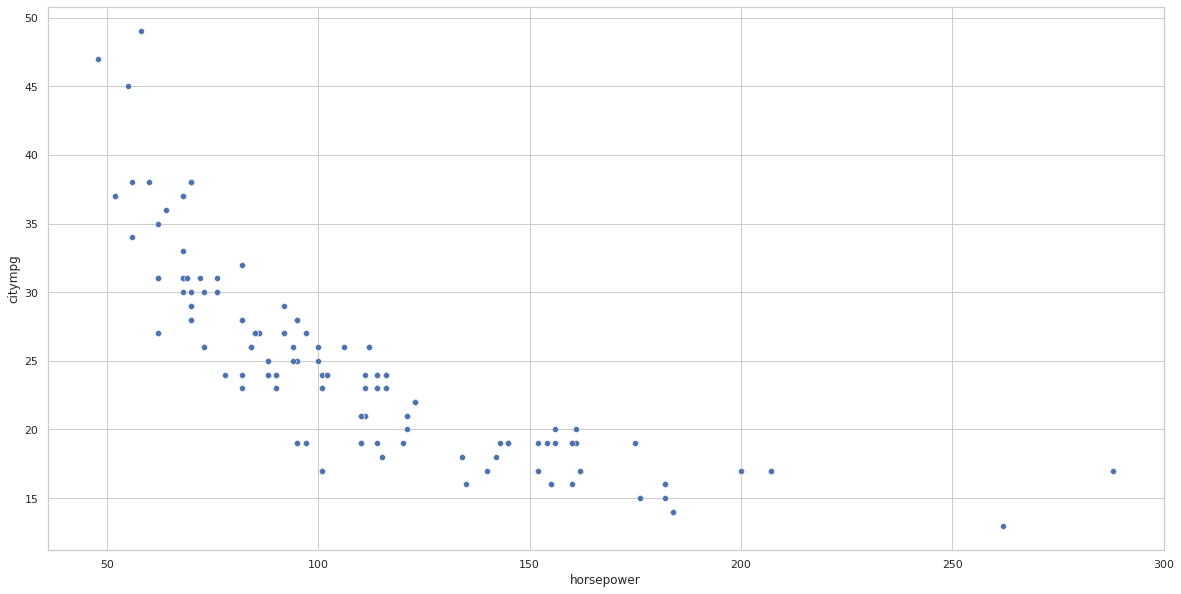

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, _ = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

sns.scatterplot(data = cars_data, x = 'horsepower', y = 'citympg')

Parece que la relación es inversamente proporcional, y más que lineal parece cuadrática.

Separamos variables predictoras (solo 'hoursepower') y la objetivo ('citympg') y también separamos el dataset en el set de train y de test. 

In [44]:
from sklearn.model_selection import train_test_split

datos_predictores = problem2_data[['horsepower']]
datos_objetivo = problem2_data[['citympg']]

#test_size hace referencia a cómo de grande queremos que sea el set de test en proporción al total (1) vamos a coger 1/5 = 0.2 approx
pred_train, pred_test, obj_train, obj_test = train_test_split(datos_predictores, datos_objetivo, test_size=0.2, random_state=42)

print("Tamaño de set de entrenamiento: [{0}] y de prueba [{1}]".format(len(pred_train), len(pred_test)))

Tamaño de set de entrenamiento: [164] y de prueba [41]


Visualizamos los puntos que van a representar el set de datos de:

* Train (azul)
* Test (verde)

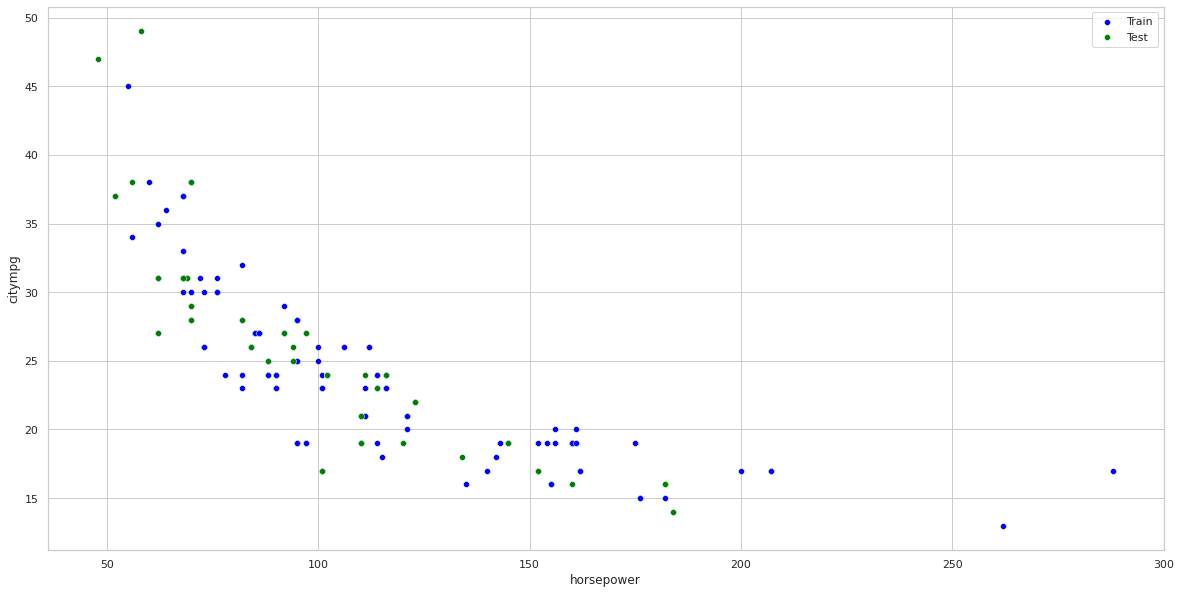

In [45]:
fig, _ = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

train_data = pd.concat([pred_train, obj_train], axis=1)
test_data = pd.concat([pred_test, obj_test], axis=1)

sns.scatterplot(data = train_data, x = 'horsepower', y = 'citympg', color = 'blue', label='Train')
sns.scatterplot(data = test_data, x = 'horsepower', y = 'citympg', color = 'green', label='Test')

##### Regresión lineal

Entrenamos un modelo de regresión lineal simple.

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(pred_train, obj_train)

lin_reg.score(pred_train, obj_train)

0.6372553382021942

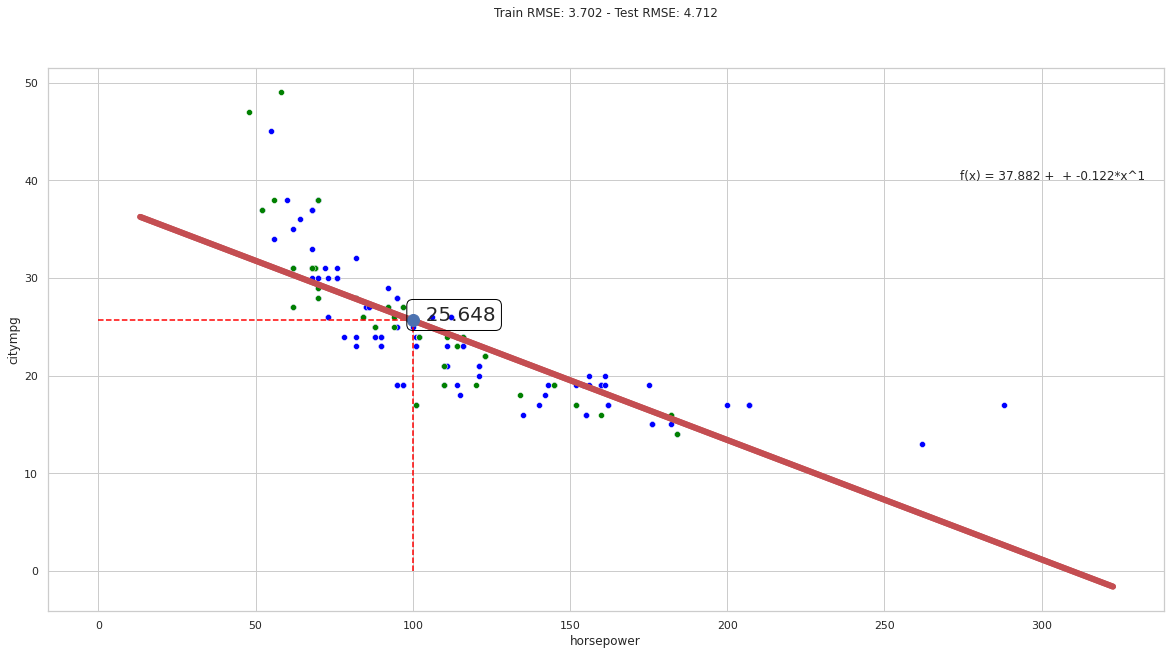

In [47]:
plot_2D_regression_result(lin_reg, train_data, test_data, 'horsepower', 'citympg', user_input=100)

Dado que parece que la relación entre las variables es cuadráticas. Es muy posible que un modelo de regresión lineal cuadrática se ajuste más a los datos.

Creamos y entrenamos un modelo de regresión lineal polinómico de grado dos (cuadrática).

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly_object = PolynomialFeatures(2, include_bias=False)

poly_reg = LinearRegression().fit(poly_object.fit_transform(pred_train), obj_train)

poly_reg.coef_

array([[-0.35687595,  0.00086593]])

Visualizamos la regresión cuadrática en el contexto del problema dado.

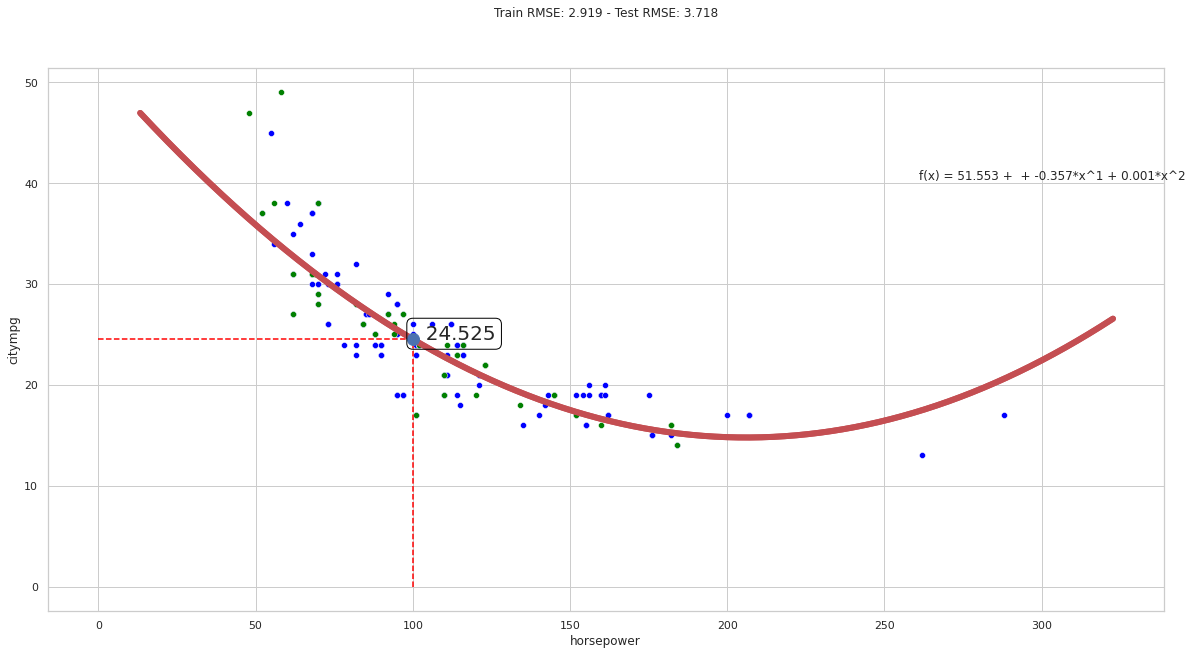

In [49]:
plot_2D_regression_result(poly_reg, train_data, test_data, 'horsepower', 'citympg', user_input=100, poly_transf=poly_object)

##### Árbol de regresión

Entrenamos un árbol de regresión limitando su profundidad máxima.

In [50]:
from sklearn.tree import DecisionTreeRegressor

reg_tree_depth = DecisionTreeRegressor(random_state=42, max_depth=4).fit(pred_train, obj_train)

Visualizamos el árbol creado y entrenado así como los resultados que proporciona el modelo para el problema actual.

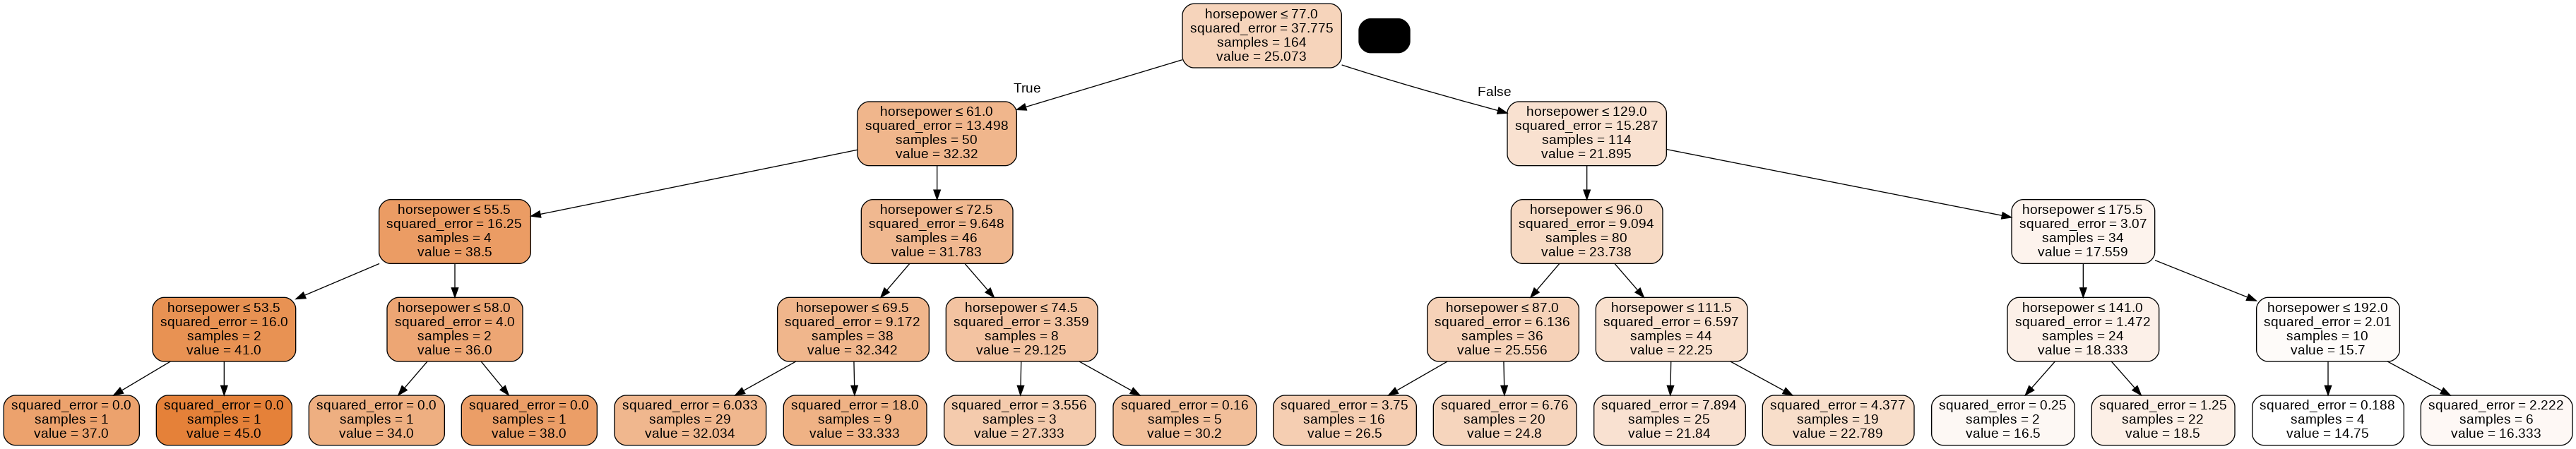

In [51]:
dot_data = StringIO()
export_graphviz(reg_tree_depth, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = pred_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('classif_tree_titanic.png')
Image(graph.create_png())

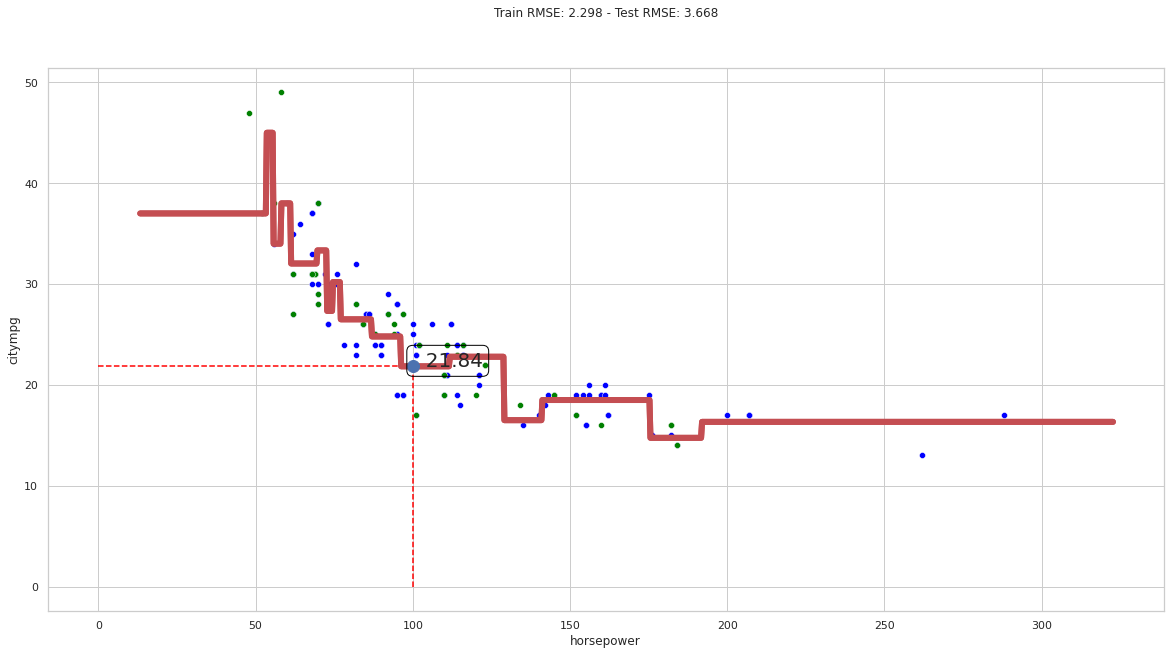

In [52]:
plot_2D_regression_result(reg_tree_depth, train_data, test_data, 'horsepower', 'citympg', user_input=100)

#### Problema 3 - Predecir precio con el resto de las variables

Visualizamos los variables presentes en el dataset.

In [53]:
cars_data

CarName fueltype  doornumber      carbody  \
0          alfa-romero giulia      gas           2  convertible   
1         alfa-romero stelvio      gas           2  convertible   
2    alfa-romero Quadrifoglio      gas           2    hatchback   
3                 audi 100 ls      gas           4        sedan   
4                  audi 100ls      gas           4        sedan   
..                        ...      ...         ...          ...   
200           volvo 145e (sw)      gas           4        sedan   
201               volvo 144ea      gas           4        sedan   
202               volvo 244dl      gas           4        sedan   
203                 volvo 246   diesel           4        sedan   
204               volvo 264gl      gas           4        sedan   

    enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0            front       88.6      168.8      64.1       48.8        2548   
1            front       88.6      168.8      64.1       48.8        2548   
2            front       94.5      171.2      65.5       52.4        2823   
3            front       99.8      176.6      66.2       54.3        2337   
4            front       99.4      176.6      66.4       54.3        2824   
..             ...        ...        ...       ...        ...         ...   
200          front      109.1      188.8      68.9       55.5        2952   
201          front      109.1      188.8      68.8       55.5        3049   
202          front      109.1      188.8      68.9       55.5        3012   
203          front      109.1      188.8      68.9       55.5        3217   
204          front      109.1      188.8      68.9       55.5        3062   

     cylindernumber  enginesize  horsepower  peakrpm  citympg  highwaympg  \
0                 4         130         111     5000       21          27   
1                 4         130         111     5000       21          27   
2                 6         152         154     5000       19          26   
3                 4         109         102     5500       24          30   
4                 5         136         115     5500       18          22   
..              ...         ...         ...      ...      ...         ...   
200               4         141         114     5400       23          28   
201               4         141         160     5300       19          25   
202               6         173         134     5500       18          23   
203               6         145         106     4800       26          27   
204               4         141         114     5400       19          25   

       price  brand  
0    13495.0  other  
1    16500.0  other  
2    16500.0  other  
3    13950.0  other  
4    17450.0  other  
..       ...    ...  
200  16845.0  volvo  
201  19045.0  volvo  
202  21485.0  volvo  
203  22470.0  volvo  
204  22625.0  volvo  

[205 rows x 18 columns]

Nos deshacemos de la variable "CarName" ya que no proporciona ningún dato predictivo de interés.

In [54]:
problem3_data = cars_data.drop(columns=['CarName'])
problem3_data

fueltype  doornumber      carbody enginelocation  wheelbase  carlength  \
0        gas           2  convertible          front       88.6      168.8   
1        gas           2  convertible          front       88.6      168.8   
2        gas           2    hatchback          front       94.5      171.2   
3        gas           4        sedan          front       99.8      176.6   
4        gas           4        sedan          front       99.4      176.6   
..       ...         ...          ...            ...        ...        ...   
200      gas           4        sedan          front      109.1      188.8   
201      gas           4        sedan          front      109.1      188.8   
202      gas           4        sedan          front      109.1      188.8   
203   diesel           4        sedan          front      109.1      188.8   
204      gas           4        sedan          front      109.1      188.8   

     carwidth  carheight  curbweight  cylindernumber  enginesize  horsepower  \
0        64.1       48.8        2548               4         130         111   
1        64.1       48.8        2548               4         130         111   
2        65.5       52.4        2823               6         152         154   
3        66.2       54.3        2337               4         109         102   
4        66.4       54.3        2824               5         136         115   
..        ...        ...         ...             ...         ...         ...   
200      68.9       55.5        2952               4         141         114   
201      68.8       55.5        3049               4         141         160   
202      68.9       55.5        3012               6         173         134   
203      68.9       55.5        3217               6         145         106   
204      68.9       55.5        3062               4         141         114   

     peakrpm  citympg  highwaympg    price  brand  
0       5000       21          27  13495.0  other  
1       5000       21          27  16500.0  other  
2       5000       19          26  16500.0  other  
3       5500       24          30  13950.0  other  
4       5500       18          22  17450.0  other  
..       ...      ...         ...      ...    ...  
200     5400       23          28  16845.0  volvo  
201     5300       19          25  19045.0  volvo  
202     5500       18          23  21485.0  volvo  
203     4800       26          27  22470.0  volvo  
204     5400       19          25  22625.0  volvo  

[205 rows x 17 columns]

Renombramos algunas variables para que puedan ser visualizadas correctamente en visualizaciones posteriores.

In [55]:
problem3_data = problem3_data.rename(columns={'fueltype' : 'ftype',
                                              'carbody' : 'cbody',
                                              'enginelocation' : 'engloc'})
problem3_data

ftype  doornumber        cbody engloc  wheelbase  carlength  carwidth  \
0       gas           2  convertible  front       88.6      168.8      64.1   
1       gas           2  convertible  front       88.6      168.8      64.1   
2       gas           2    hatchback  front       94.5      171.2      65.5   
3       gas           4        sedan  front       99.8      176.6      66.2   
4       gas           4        sedan  front       99.4      176.6      66.4   
..      ...         ...          ...    ...        ...        ...       ...   
200     gas           4        sedan  front      109.1      188.8      68.9   
201     gas           4        sedan  front      109.1      188.8      68.8   
202     gas           4        sedan  front      109.1      188.8      68.9   
203  diesel           4        sedan  front      109.1      188.8      68.9   
204     gas           4        sedan  front      109.1      188.8      68.9   

     carheight  curbweight  cylindernumber  enginesize  horsepower  peakrpm  \
0         48.8        2548               4         130         111     5000   
1         48.8        2548               4         130         111     5000   
2         52.4        2823               6         152         154     5000   
3         54.3        2337               4         109         102     5500   
4         54.3        2824               5         136         115     5500   
..         ...         ...             ...         ...         ...      ...   
200       55.5        2952               4         141         114     5400   
201       55.5        3049               4         141         160     5300   
202       55.5        3012               6         173         134     5500   
203       55.5        3217               6         145         106     4800   
204       55.5        3062               4         141         114     5400   

     citympg  highwaympg    price  brand  
0         21          27  13495.0  other  
1         21          27  16500.0  other  
2         19          26  16500.0  other  
3         24          30  13950.0  other  
4         18          22  17450.0  other  
..       ...         ...      ...    ...  
200       23          28  16845.0  volvo  
201       19          25  19045.0  volvo  
202       18          23  21485.0  volvo  
203       26          27  22470.0  volvo  
204       19          25  22625.0  volvo  

[205 rows x 17 columns]

Transformamos las variables categóricas por médio de la técnica "One Hot Encoding".

In [56]:
problem3_data = pd.get_dummies(problem3_data, columns=['brand', 'ftype','cbody', 'engloc'])
problem3_data

doornumber  wheelbase  carlength  carwidth  carheight  curbweight  \
0             2       88.6      168.8      64.1       48.8        2548   
1             2       88.6      168.8      64.1       48.8        2548   
2             2       94.5      171.2      65.5       52.4        2823   
3             4       99.8      176.6      66.2       54.3        2337   
4             4       99.4      176.6      66.4       54.3        2824   
..          ...        ...        ...       ...        ...         ...   
200           4      109.1      188.8      68.9       55.5        2952   
201           4      109.1      188.8      68.8       55.5        3049   
202           4      109.1      188.8      68.9       55.5        3012   
203           4      109.1      188.8      68.9       55.5        3217   
204           4      109.1      188.8      68.9       55.5        3062   

     cylindernumber  enginesize  horsepower  peakrpm  ...  brand_volvo  \
0                 4         130         111     5000  ...            0   
1                 4         130         111     5000  ...            0   
2                 6         152         154     5000  ...            0   
3                 4         109         102     5500  ...            0   
4                 5         136         115     5500  ...            0   
..              ...         ...         ...      ...  ...          ...   
200               4         141         114     5400  ...            1   
201               4         141         160     5300  ...            1   
202               6         173         134     5500  ...            1   
203               6         145         106     4800  ...            1   
204               4         141         114     5400  ...            1   

     ftype_diesel  ftype_gas  cbody_convertible  cbody_hardtop  \
0               0          1                  1              0   
1               0          1                  1              0   
2               0          1                  0              0   
3               0          1                  0              0   
4               0          1                  0              0   
..            ...        ...                ...            ...   
200             0          1                  0              0   
201             0          1                  0              0   
202             0          1                  0              0   
203             1          0                  0              0   
204             0          1                  0              0   

     cbody_hatchback  cbody_sedan  cbody_wagon  engloc_front  engloc_rear  
0                  0            0            0             1            0  
1                  0            0            0             1            0  
2                  1            0            0             1            0  
3                  0            1            0             1            0  
4                  0            1            0             1            0  
..               ...          ...          ...           ...          ...  
200                0            1            0             1            0  
201                0            1            0             1            0  
202                0            1            0             1            0  
203                0            1            0             1            0  
204                0            1            0             1            0  

[205 rows x 32 columns]

Estudiamos la correlación linear entre todas las variables.

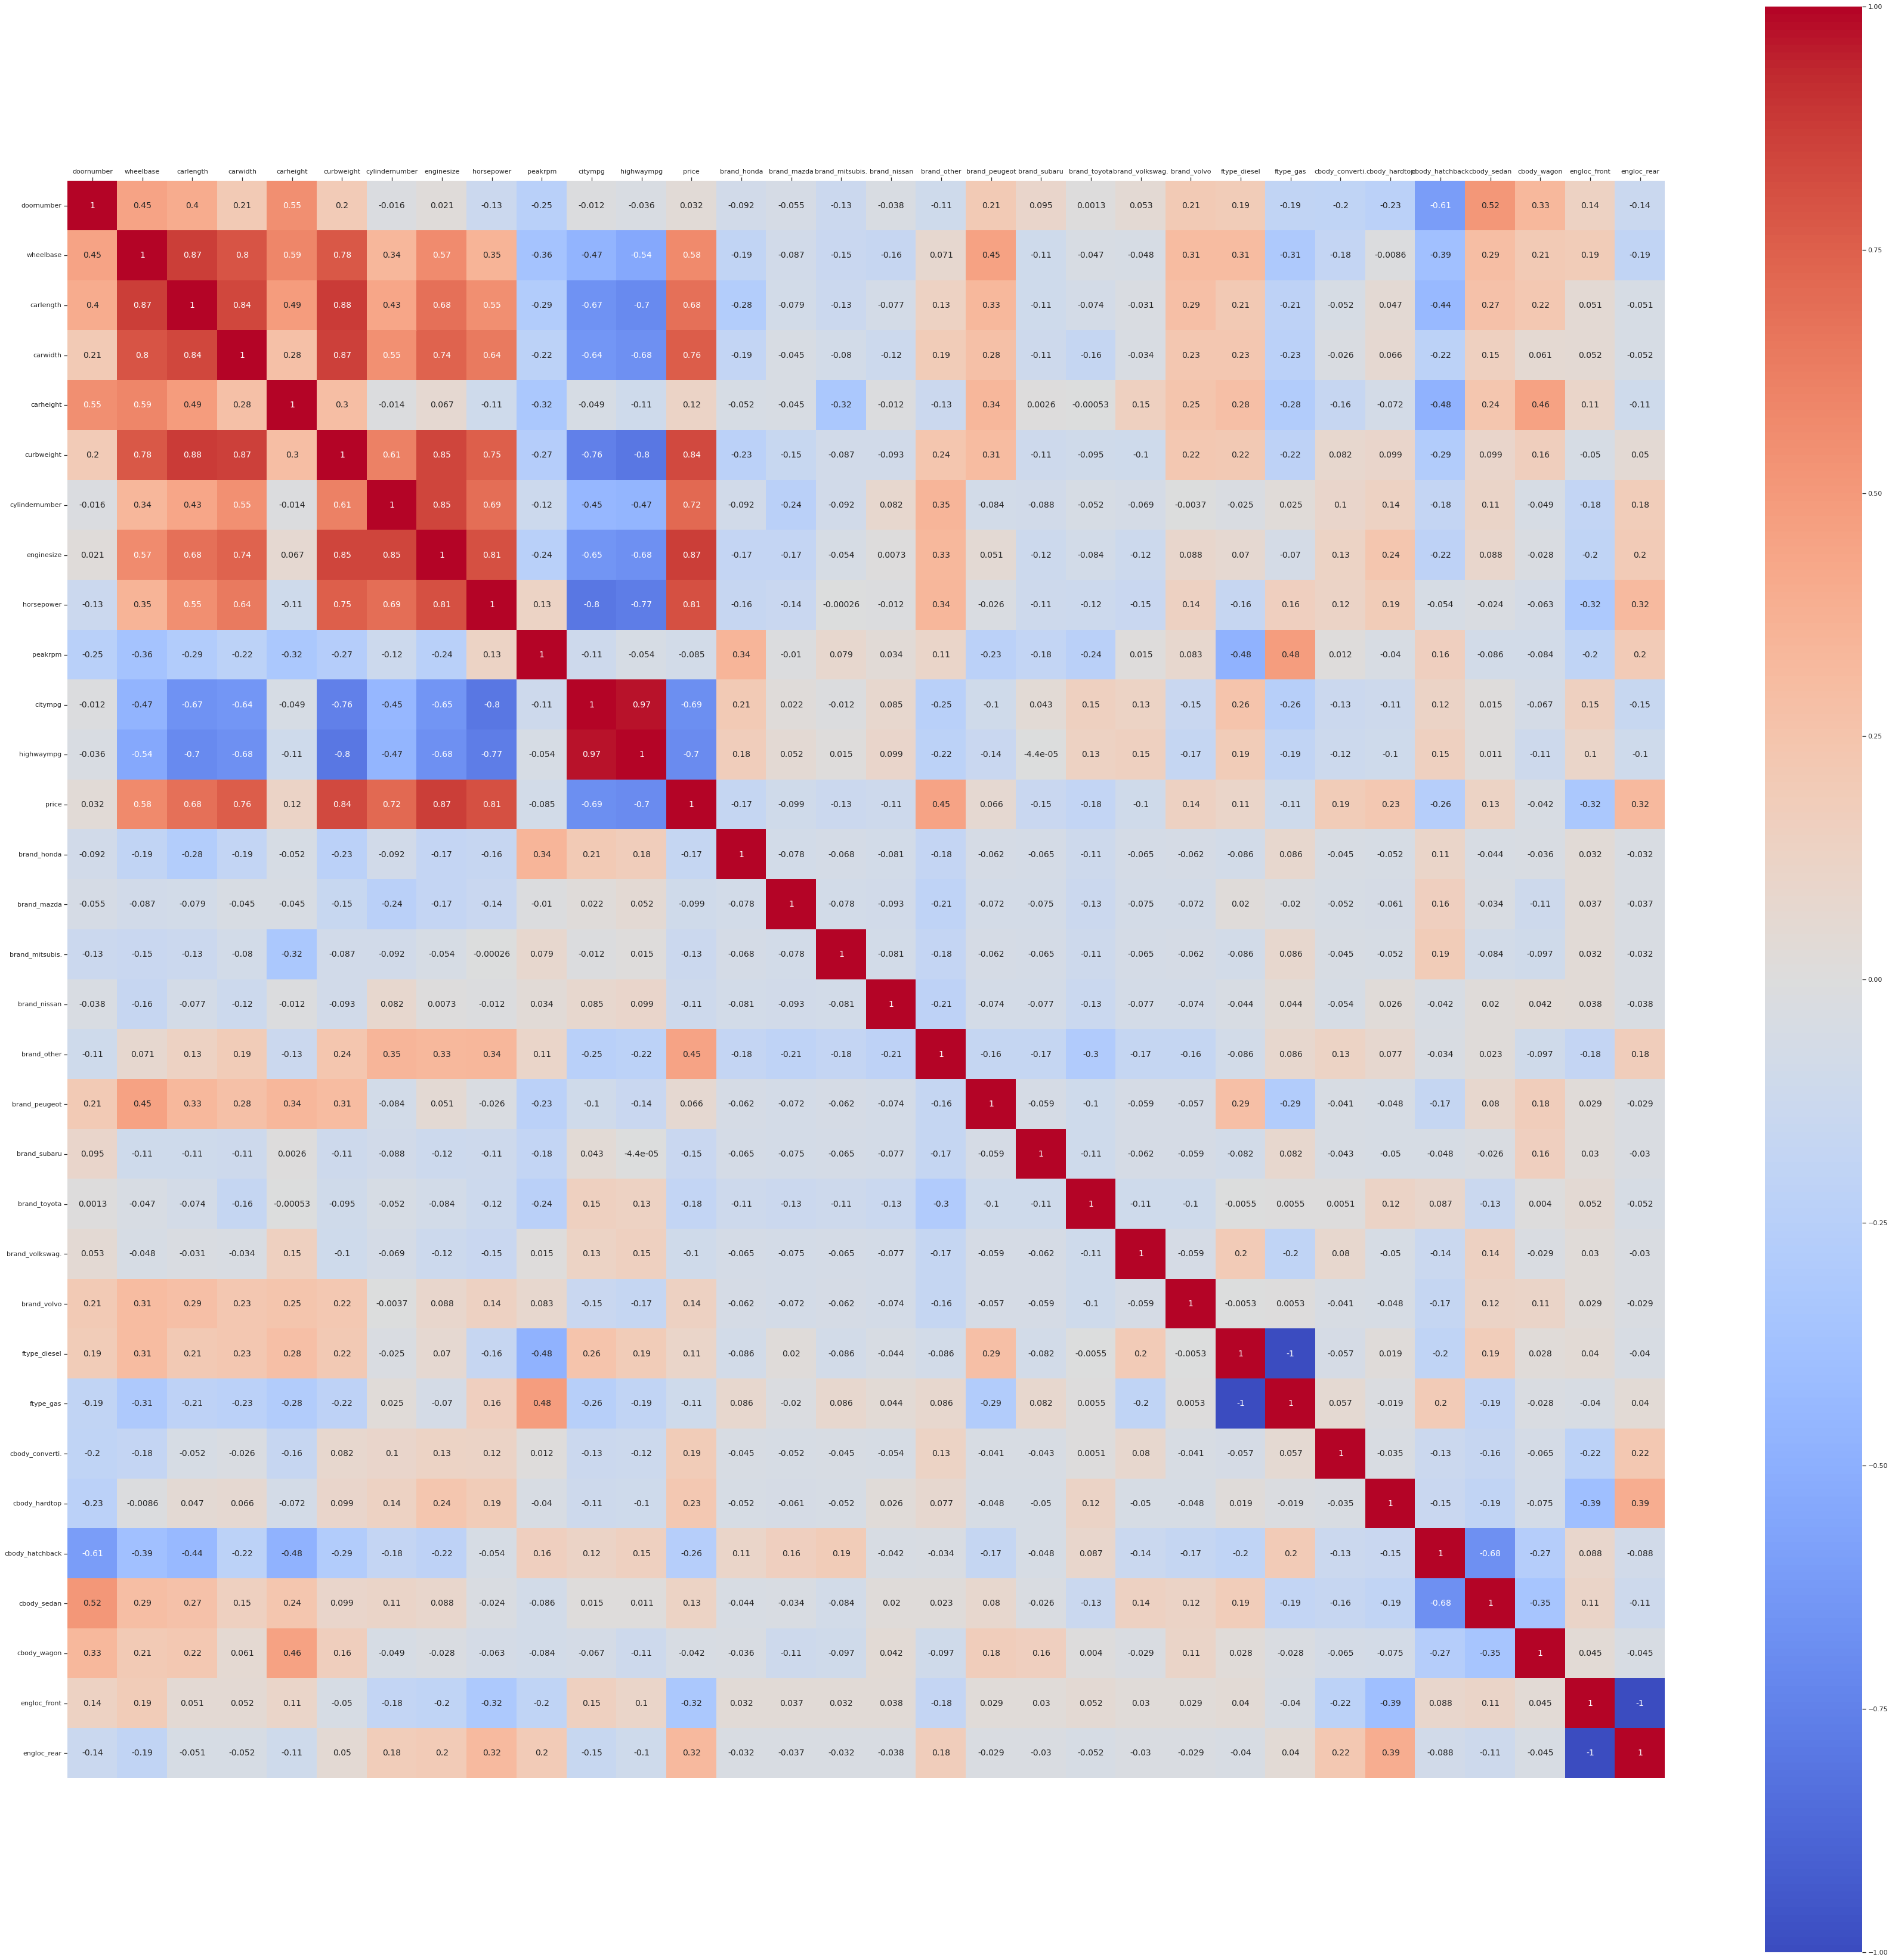

In [57]:
plot_correlation_matrix(problem3_data.corr(method='pearson'), fig_size = (60, 60))

Realizamos un ranking de los pares de variables que presentan una correlación linear más fuerte (valor absoluto).

In [58]:
corr_ranking = problem3_data.corr(method='pearson').abs().unstack().sort_values(kind="quicksort", ascending=False)\
                            .reset_index().rename(columns={'level_0' : 'variable_X', 'level_1': 'variable_Y', 0 : 'Corr'})
corr_ranking.drop(corr_ranking.iloc[1::2].index)[corr_ranking['Corr'] <1].head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



variable_X      variable_Y      Corr
36  highwaympg         citympg  0.971337
38   carlength      curbweight  0.877728
40   wheelbase       carlength  0.874587
42  enginesize           price  0.874145
44  curbweight        carwidth  0.867032
46  enginesize      curbweight  0.850594
48  enginesize  cylindernumber  0.846031
50    carwidth       carlength  0.841118
52       price      curbweight  0.835305
54  horsepower      enginesize  0.809769
56       price      horsepower  0.808139
58     citympg      horsepower  0.801456
60  highwaympg      curbweight  0.797465
62    carwidth       wheelbase  0.795144
64  curbweight       wheelbase  0.776386
66  horsepower      highwaympg  0.770544
68       price        carwidth  0.759325
70     citympg      curbweight  0.757414
72  horsepower      curbweight  0.750739
74  enginesize        carwidth  0.735433

Separamos los datos en set de train, test, así como variables objetivo y predictoras.

In [59]:
from sklearn.model_selection import train_test_split

datos_predictores = problem3_data.drop(columns=['price'])
datos_objetivo = problem3_data[['price']]

#test_size hace referencia a cómo de grande queremos que sea el set de test en proporción al total (1) vamos a coger 1/5 = 0.2 approx
pred_train, pred_test, obj_train, obj_test = train_test_split(datos_predictores, datos_objetivo, test_size=0.2, random_state=42)

print("Tamaño de set de entrenamiento: [{0}] y de prueba [{1}]".format(len(pred_train), len(pred_test)))

Tamaño de set de entrenamiento: [164] y de prueba [41]


##### XGBoost

Entrenamos el modelo XGboost

In [82]:
import xgboost as xgb

xg_boost = xgb.XGBRegressor(max_depth = 5, n_estimators = 22, random_state= 4)

evalset = [(pred_train, obj_train), (pred_test, obj_test)]
# Fit
xg_boost = xg_boost.fit(pred_train, obj_train.values.ravel(), eval_metric=["rmse"], eval_set=evalset, verbose = True)

[19:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13887.4	validation_1-rmse:14582.5
[1]	validation_0-rmse:12605.4	validation_1-rmse:13174
[2]	validation_0-rmse:11449.1	validation_1-rmse:11897.5
[3]	validation_0-rmse:10401.9	validation_1-rmse:10732.1
[4]	validation_0-rmse:9457.97	validation_1-rmse:9704.62
[5]	validation_0-rmse:8608	validation_1-rmse:8768.95
[6]	validation_0-rmse:7842.64	validation_1-rmse:7942.16
[7]	validation_0-rmse:7150.77	validation_1-rmse:7192.26
[8]	validation_0-rmse:6529.4	validation_1-rmse:6538.07
[9]	validation_0-rmse:5968.51	validation_1-rmse:5944.52
[10]	validation_0-rmse:5460.28	validation_1-rmse:5431.01
[11]	validation_0-rmse:5003.59	validation_1-rmse:4986.58
[12]	validation_0-rmse:4589.65	validation_1-rmse:4601.99
[13]	validation_0-rmse:4217.3	validation_1-rmse:4265.77
[14]	validation_0-rmse:3882.39	validation_1-rmse:3968.29
[15]	validation_0-rmse:3573.12	vali

Visualizamos cómo ha evolucionado el error RMSE según ha ido añadiendo nuevos datos en ambos sets, el de train y el de test.

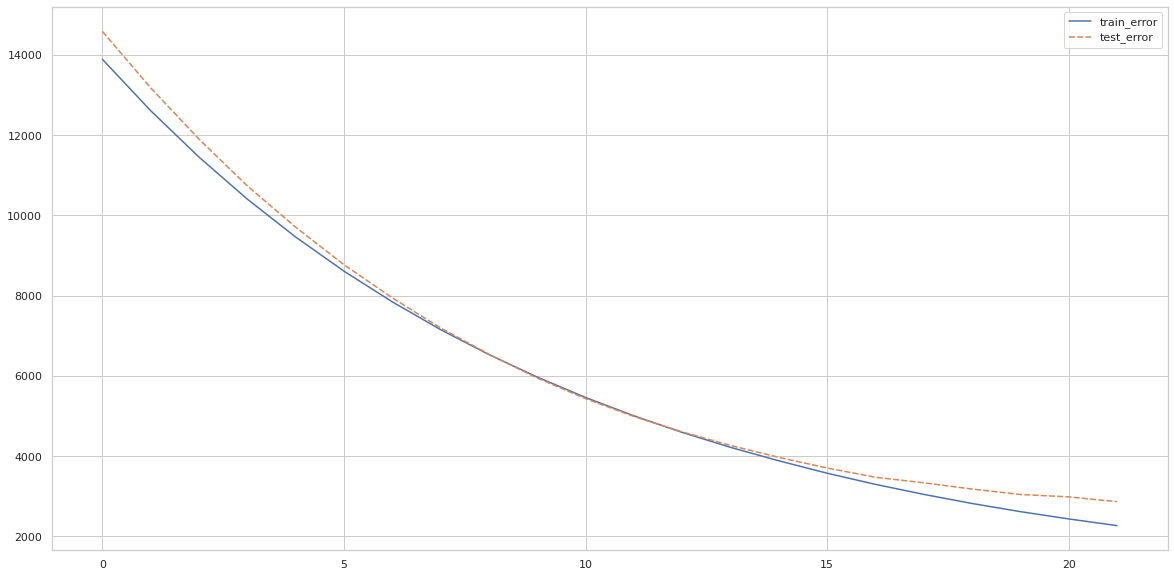

In [83]:
training_results = xg_boost.evals_result()
plot_xgboost_training_results(training_results)

Extraemos el RMSE final que tiene el modelo sobre el set de test para predecir el precio.

In [84]:
from sklearn.metrics import mean_squared_error

print('Train RMSE: {0} - Test RMSE: {1}'.format(mean_squared_error(xg_boost.predict(pred_train), obj_train, squared=False), mean_squared_error(xg_boost.predict(pred_test), obj_test, squared=False)))

Train RMSE: 2267.5986132188714 - Test RMSE: 2862.554058301849


Visualizamos la importancia de las variables dentro del modelo XGboost entrenado atendiendo a el número de veces que aparece cada una dentro de los árboles creados.

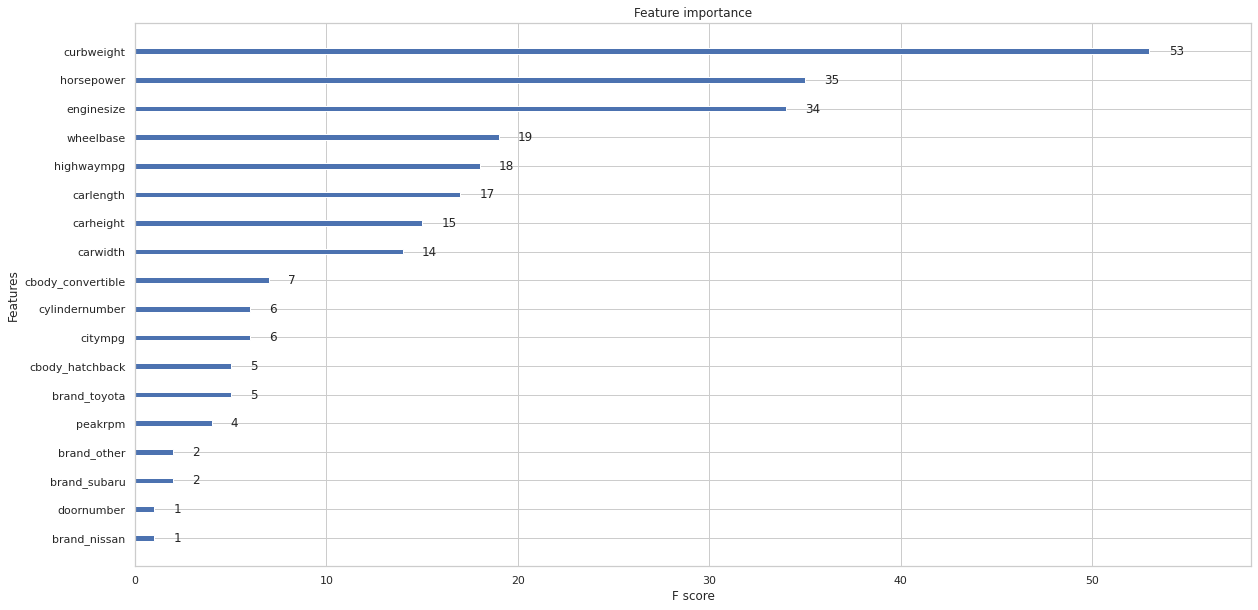

In [85]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))

xgb.plot_importance(xg_boost, ax=ax, importance_type = 'weight')